In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import pearsonr

import ptitprince as pt

In [3]:
path = 'dataset.parquet'

df = pd.read_parquet(path)
df

time  sample  anomaly  category  setting  action  active  \
0         0.000000       0     True         0        0       0       0   
1         0.010047       0     True         0        0       0       0   
2         0.020135       0     True         0        0       0       0   
3         0.030203       0     True         0        0       0       0   
4         0.040257       0     True         0        0       0       0   
...            ...     ...      ...       ...      ...     ...     ...   
2321685  10.716863    2121    False        12       76      13       1   
2321686  10.726921    2121    False        12       76      13       1   
2321687  10.737022    2121    False        12       76      13       1   
2321688  10.747115    2121    False        12       76      13       1   
2321689  10.757177    2121    False        12       76      13       1   

         robot_voltage  robot_current  io_current  ...  torque_sensor_a_6  \
0            48.582687       0.322263    0.087890  ...           0.069086   
1            48.582687       0.527340    0.087890  ...           0.055269   
2            48.561890       0.380857    0.087890  ...           0.060796   
3            48.582687       0.483395    0.087890  ...           0.046979   
4            48.582687       0.307615    0.087890  ...           0.046979   
...                ...            ...         ...  ...                ...   
2321685      48.561890       0.688472    0.087890  ...           0.055269   
2321686      48.561890       0.644527    0.073242  ...           0.041452   
2321687      48.541092       0.908197    0.087890  ...           0.066323   
2321688      48.582687       0.688472    0.117187  ...           0.069086   
2321689      48.582687       0.703120    0.087890  ...           0.066323   

         torque_sensor_b_6  motor_iq_6  motor_id_6  power_motor_el_6  \
0                -0.066240    0.161936   -0.019600          0.115915   
1                -0.063480    0.142992    0.020944          0.134123   
2                -0.080041    0.145380    0.011475          0.115405   
3                -0.066240    0.147767    0.002005          0.097916   
4                -0.074521    0.147767    0.002005          0.104346   
...                    ...         ...         ...               ...   
2321685          -0.063480    0.133460    0.024379          0.103935   
2321686          -0.044160    0.142870    0.021766          0.078053   
2321687          -0.049680    0.124408   -0.008216          0.080420   
2321688          -0.044160    0.124408   -0.008216          0.092157   
2321689          -0.052440    0.131376   -0.001374          0.073302   

         power_motor_mech_6  power_load_mech_6  motor_voltage_6  \
0                       0.0       1.157006e-05         0.729223   
1                       0.0      -7.832955e-07         0.630203   
2                       0.0       4.344085e-07         0.620702   
3                       0.0       2.882664e-06         0.623614   
4                       0.0       6.304338e-07         0.499930   
...                     ...                ...              ...   
2321685                 0.0      -1.502957e-05         0.595642   
2321686                 0.0       7.213437e-07         0.517480   
2321687                 0.0       9.829410e-06         0.496470   
2321688                 0.0       7.721170e-06         0.817346   
2321689                 0.0       8.201027e-06         0.466415   

         supply_voltage_6  brake_voltage_6  
0               47.783798        11.177029  
1               47.783798        10.976003  
2               47.803898        11.217231  
3               47.783798        11.177029  
4               47.803898        11.156923  
...                   ...              ...  
2321685         47.803898        11.217231  
2321686         47.803898        10.976000  
2321687         47.783798        11.197131  
2321688         47.783798        11.116721  
2321689         47.783798        11

In [4]:
# Excluding ['time','sample','category','setting','action','active']
df = df.drop(['time','sample','category','setting','action','active'], axis=1)

# Converting the column 'anomaly' from boolean to int
df['anomaly'] = df['anomaly'].astype(int)

df

anomaly  robot_voltage  robot_current  io_current  system_current  \
0              1      48.582687       0.322263    0.087890        0.278318   
1              1      48.582687       0.527340    0.087890        0.410153   
2              1      48.561890       0.380857    0.087890        0.292967   
3              1      48.582687       0.483395    0.087890        0.263670   
4              1      48.582687       0.307615    0.087890        0.263670   
...          ...            ...            ...         ...             ...   
2321685        0      48.561890       0.688472    0.087890        0.263670   
2321686        0      48.561890       0.644527    0.073242        0.219725   
2321687        0      48.541092       0.908197    0.087890        0.263670   
2321688        0      48.582687       0.688472    0.117187        0.278318   
2321689        0      48.582687       0.703120    0.087890        0.278318   

         target_position_1  target_velocity_1  target_acceleration_1  \
0                -0.341433               -0.0                   -0.0   
1                -0.341433               -0.0                   -0.0   
2                -0.341433               -0.0                   -0.0   
3                -0.341433               -0.0                   -0.0   
4                -0.341433               -0.0                   -0.0   
...                    ...                ...                    ...   
2321685          -0.341433               -0.0                   -0.0   
2321686          -0.341433               -0.0                   -0.0   
2321687          -0.341433               -0.0                   -0.0   
2321688          -0.341433               -0.0                   -0.0   
2321689          -0.341433               -0.0                   -0.0   

         target_torque_1  computed_inertia_1  ...  torque_sensor_a_6  \
0               0.127406            2.251855  ...           0.069086   
1               0.314227            2.251855  ...           0.055269   
2               0.002657            2.251855  ...           0.060796   
3              -0.128248            2.251855  ...           0.046979   
4               0.097738            2.251855  ...           0.046979   
...                  ...                 ...  ...                ...   
2321685        -1.652499            2.251218  ...           0.055269   
2321686        -1.703043            2.251505  ...           0.041452   
2321687        -1.405120            2.251686  ...           0.066323   
2321688        -1.668486            2.251787  ...           0.069086   
2321689        -1.634014            2.251834  ...           0.066323   

         torque_sensor_b_6  motor_iq_6  motor_id_6  power_motor_el_6  \
0                -0.066240    0.161936   -0.019600          0.115915   
1                -0.063480    0.142992    0.020944          0.134123   
2                -0.080041    0.145380    0.011475          0.115405   
3                -0.066240    0.147767    0.002005          0.097916   
4                -0.074521    0.147767    0.002005          0.104346   
...                    ...         ...         ...               ...   
2321685          -0.063480    0.133460    0.024379          0.103935   
2321686          -0.044160    0.142870    0.021766          0.078053   
2321687          -0.049680    0.124408   -0.008216          0.080420   
2321688          -0.044160    0.124408   -0.008216          0.092157   
2321689          -0.052440    0.131376   -0.001374          0.073302   

         power_motor_mech_6  power_load_mech_6  motor_voltage_6  \
0                       0.0       1.157006e-05         0.729223   
1                       0.0      -7.832955e-07         0.630203   
2                       0.0       4.344085e-07         0.620702   
3                       0.0       2.882664e-06         0.623614   
4                       0.0       6.304338e-07         0.499930   
...                     ...                ...              ...   
2321685 

## Box Plot

In [7]:
def box_and_whisker(data, title, ylabel, xticklabels, save=True):
    """
    Create a box-and-whisker plot with significance bars.
    """
    
    sns.set(font="Arial", style="ticks")
    sns.set_context("paper", font_scale=1.3)

    ax = plt.axes()
    bp = ax.boxplot(data, widths=0.6, patch_artist=True, showfliers=False)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xticklabels)
    ax.tick_params(axis='x', which='minor', length=3, width=1)

    colors = sns.color_palette("hls", 8)
    red = colors[0]
    purple = colors[-2]
    green = colors[3]
    colors_list = [red, green, purple]

    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)

    plt.setp(bp['medians'], color='k')

    significant_combinations = []
    p_values = []
    ls = list(range(1, len(data) + 1))
    combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]
    for c in combinations:
        data1 = data[c[0] - 1]
        data2 = data[c[1] - 1]
        U, p = stats.ttest_ind(data1, data2)
        p_values.append(p)
        if p < 0.05:
            significant_combinations.append([c, p])

    bottom, top = ax.get_ylim()
    yrange = top - bottom

    for i, significant_combination in enumerate(significant_combinations):
        x1 = significant_combination[0][0]
        x2 = significant_combination[0][1]
        level = len(significant_combinations) - i
        bar_height = (yrange * 0.08 * level) + top
        bar_tips = bar_height - (yrange * 0.02)
        plt.plot([x1, x1, x2, x2], [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
        p = significant_combination[1]
        if p < 0.001:
            sig_symbol = '***'
        elif p < 0.01:
            sig_symbol = '**'
        elif p < 0.05:
            sig_symbol = '*'
        text_height = bar_height + (yrange * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', c='k')

    bottom, top = ax.get_ylim()
    top = top + (yrange * 0.05)
    yrange = top - bottom
    ax.set_ylim(bottom - 0.02 * yrange, top)
    plt.grid(axis='y')

    if save:
        if not os.path.exists('figures/boxplot'):
            os.makedirs('figures/boxplot')
        plt.savefig('figures/boxplot/' + title + '.png', dpi=1200)

    plt.show()
    return p_values

def plot_boxplot(df, column, title, ylabel, xticklabels, save=True):
    array = []
    
    for i in [1, 0]:
        array.append(df[df.anomaly == i][column].values)
    
    pvalues = box_and_whisker(array, title, ylabel, xticklabels, save=save)

    return pvalues

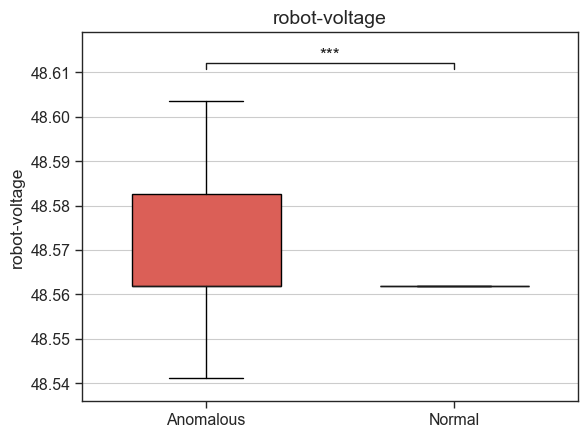

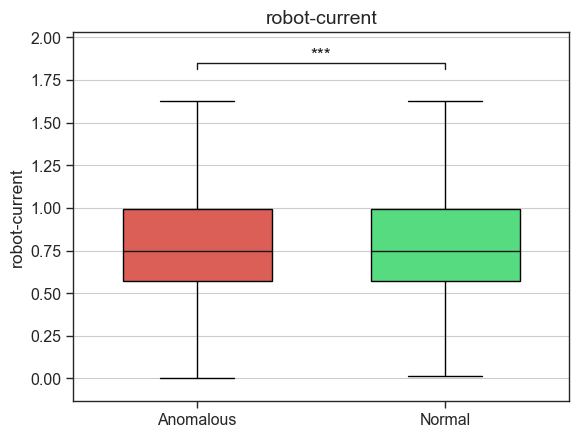

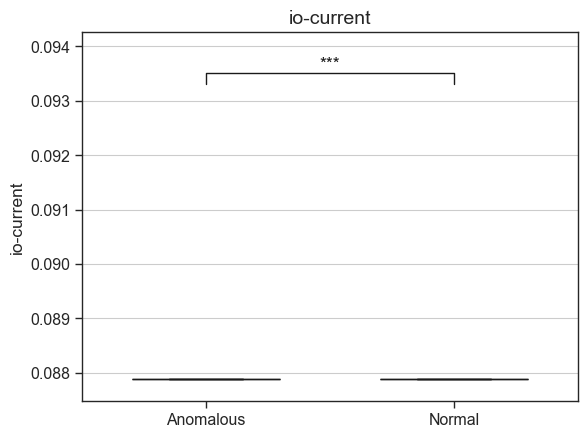

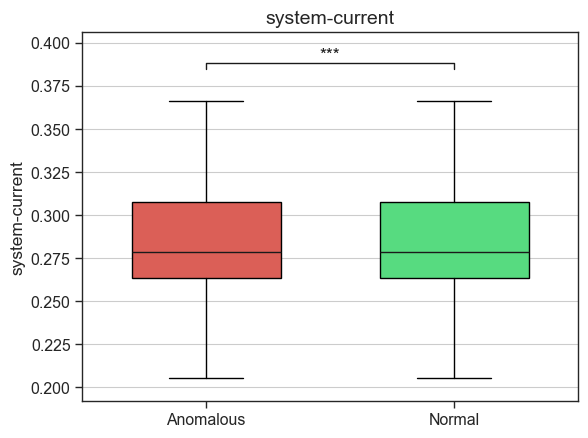

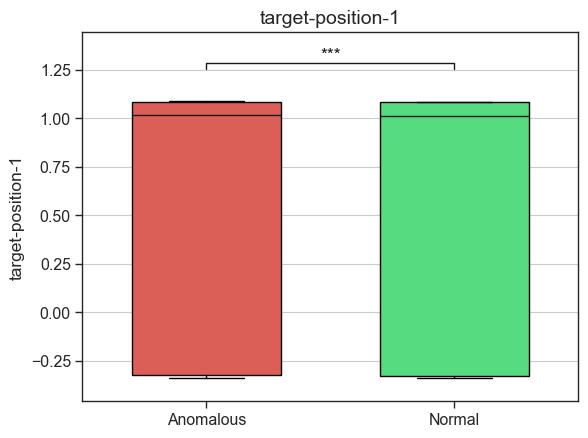

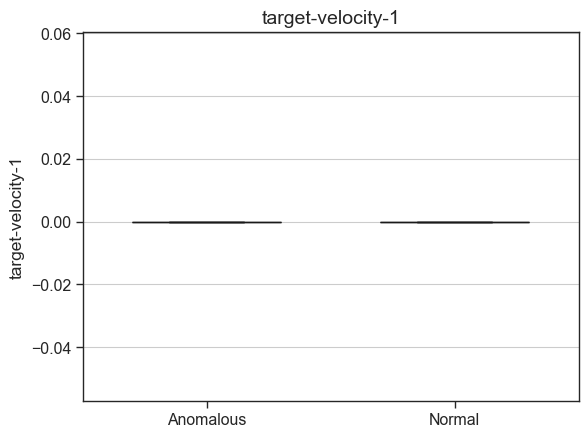

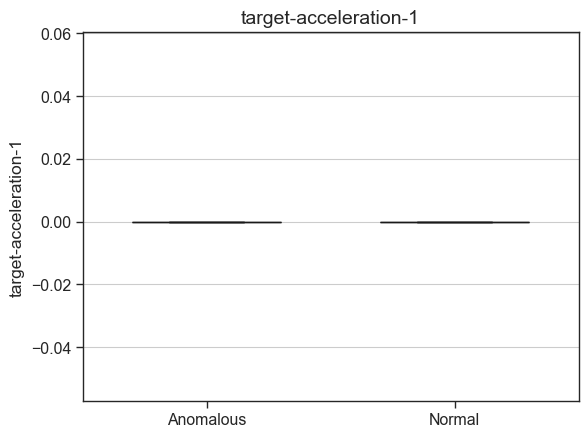

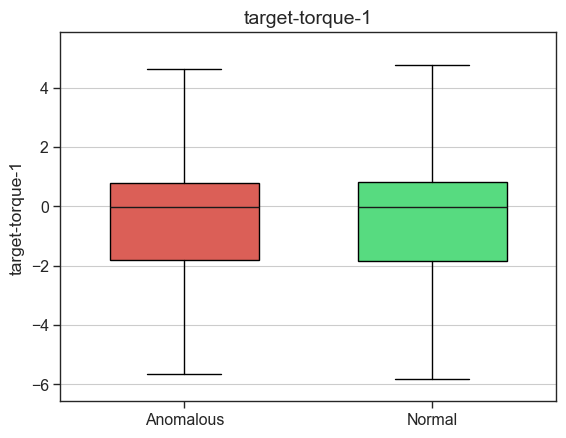

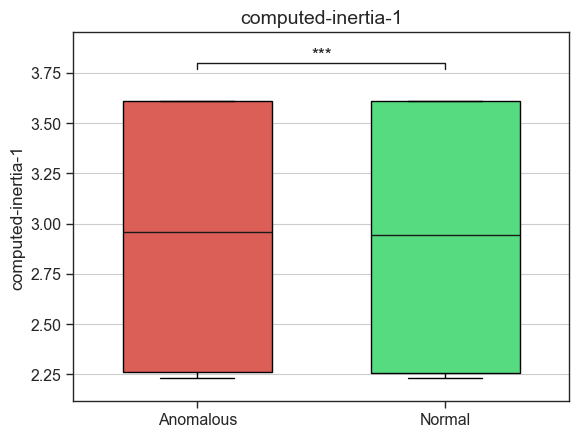

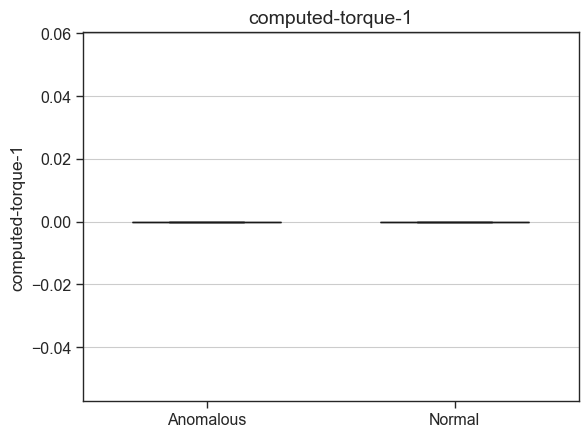

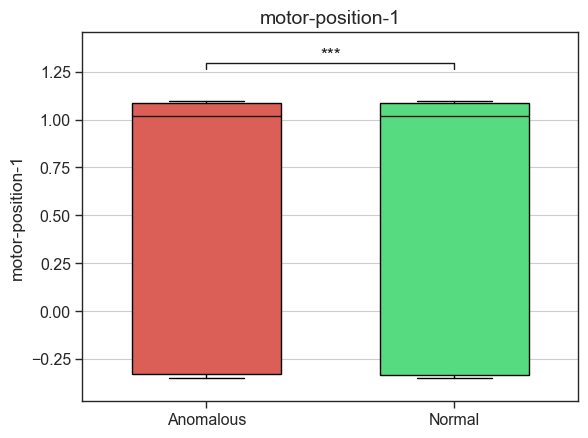

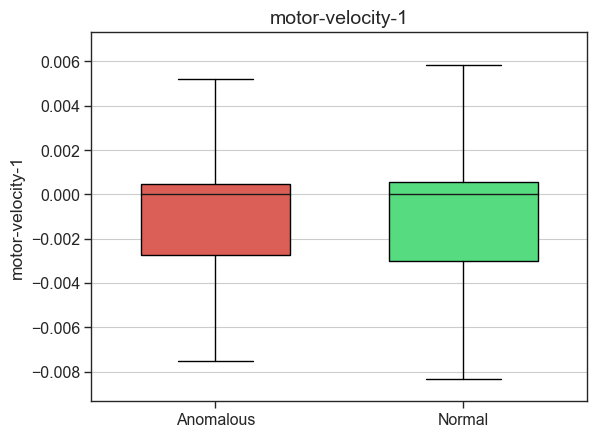

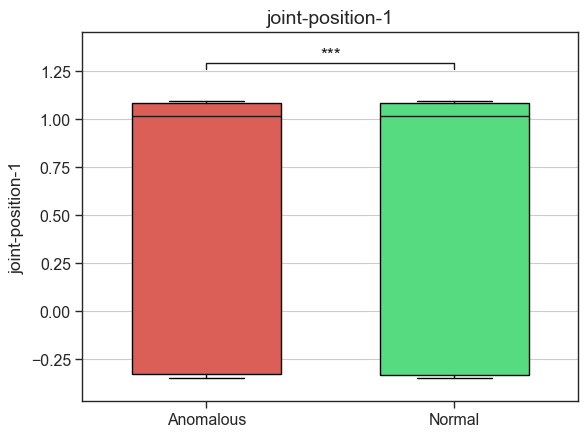

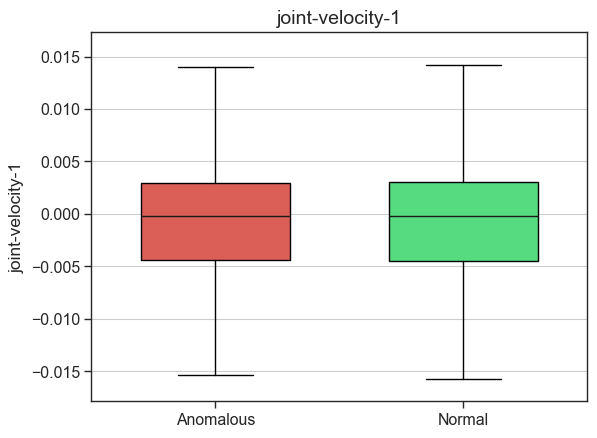

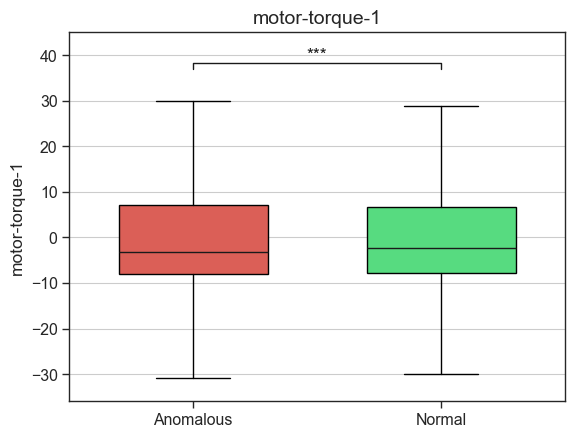

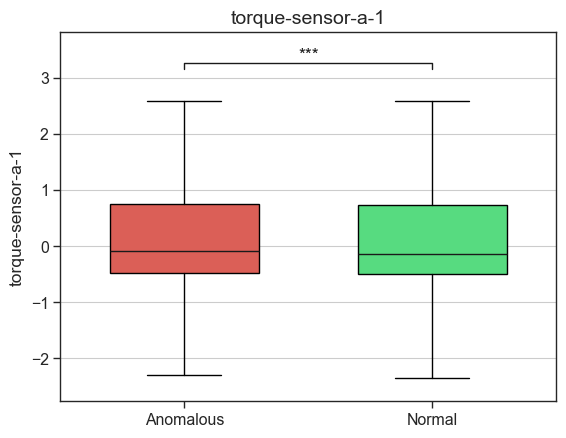

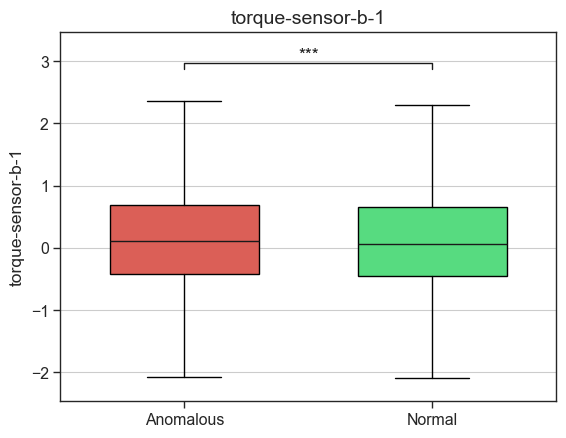

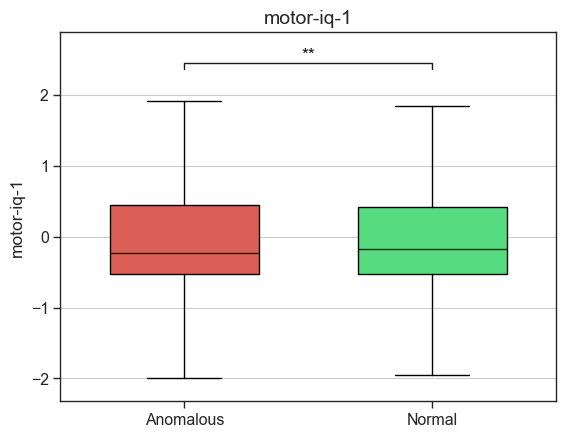

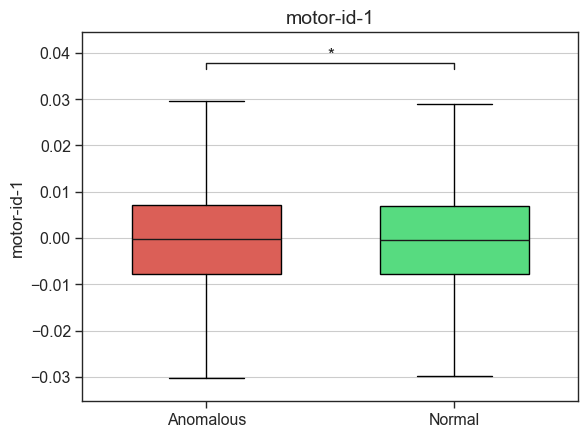

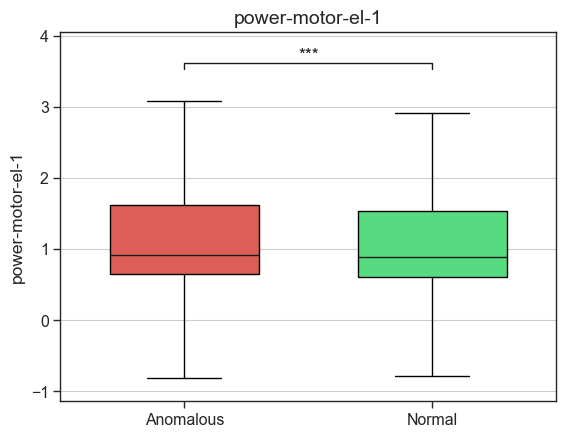

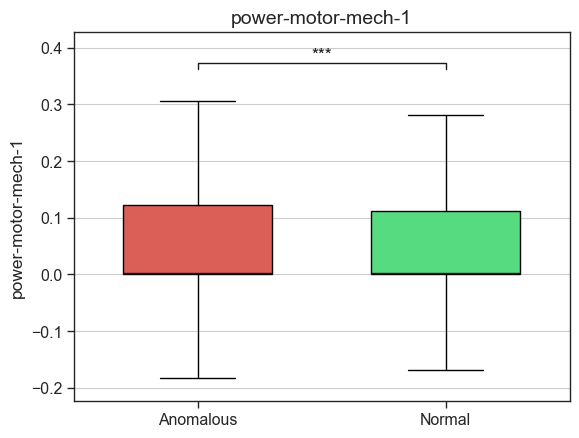

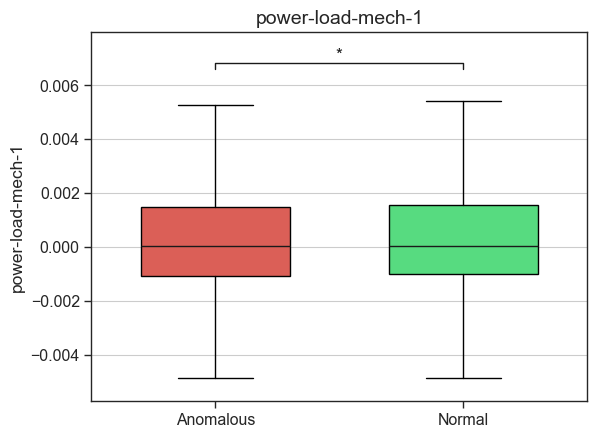

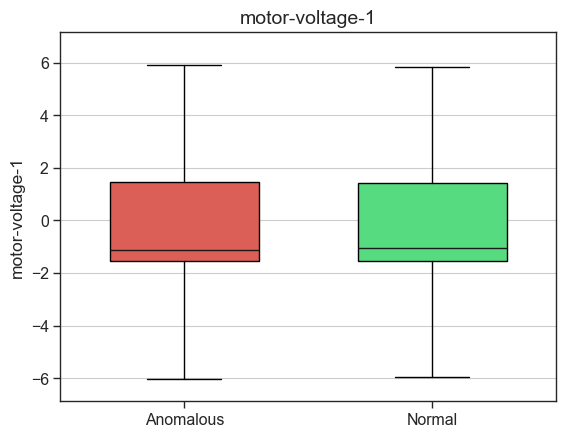

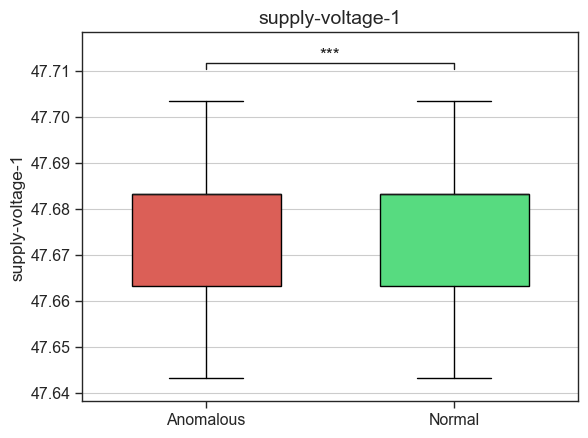

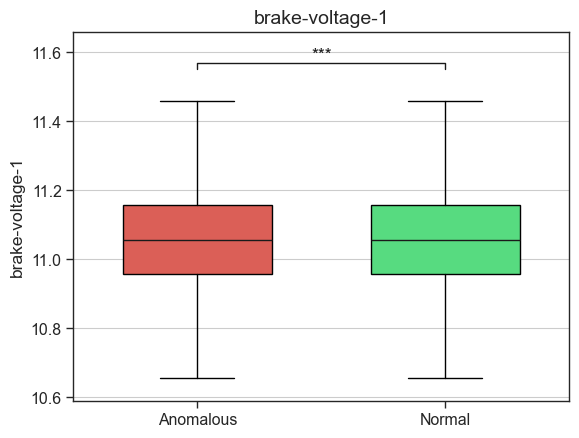

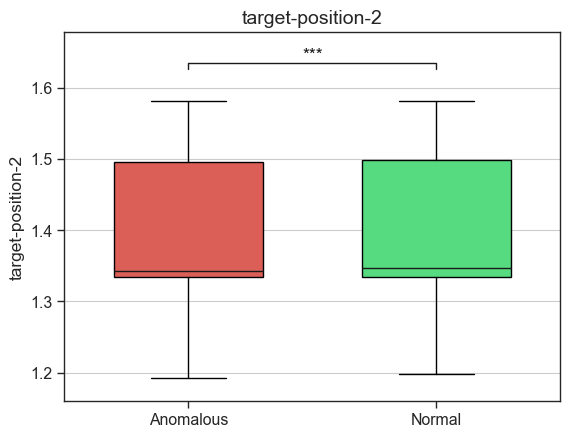

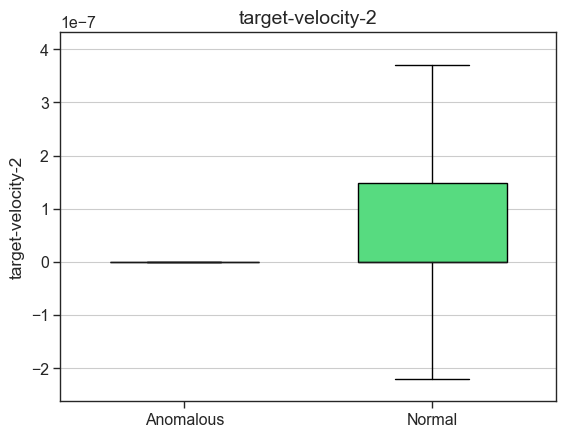

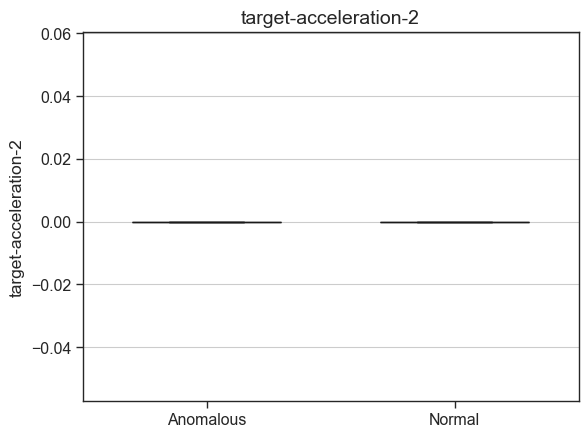

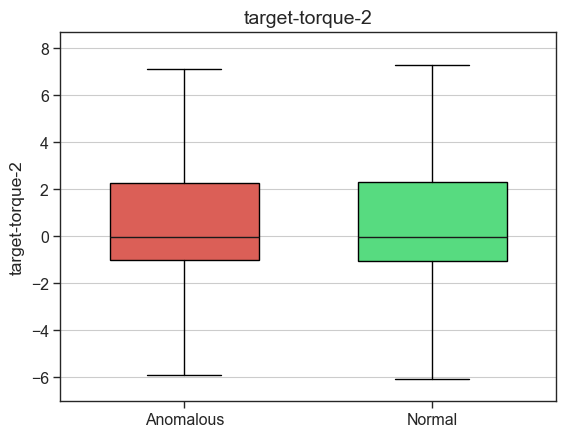

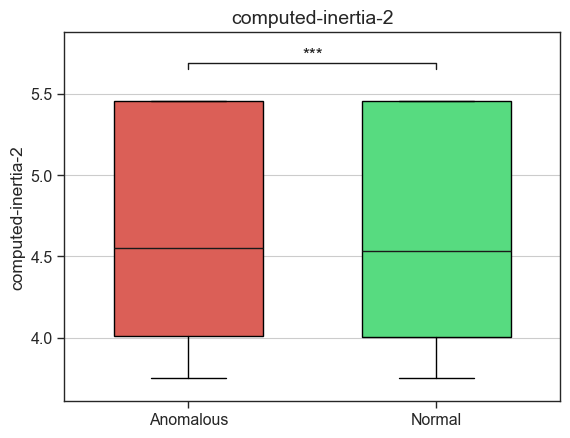

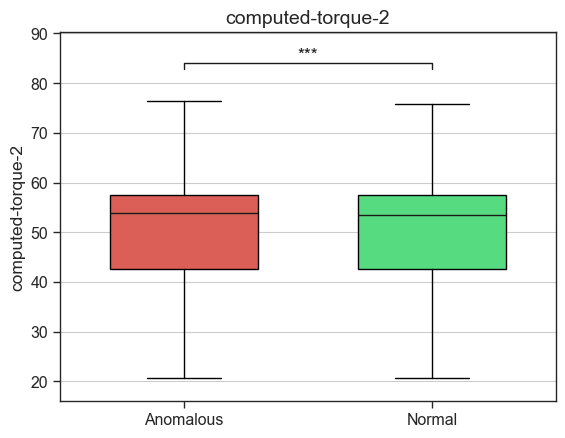

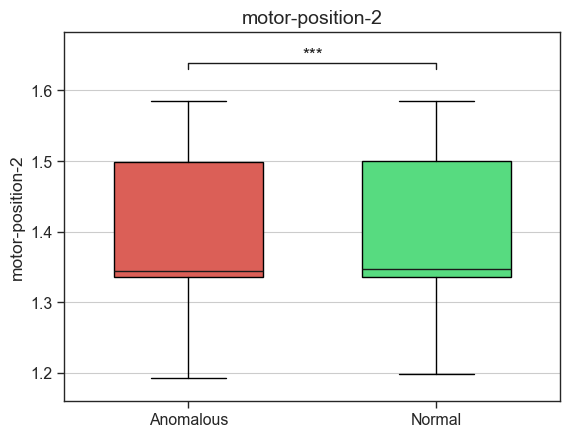

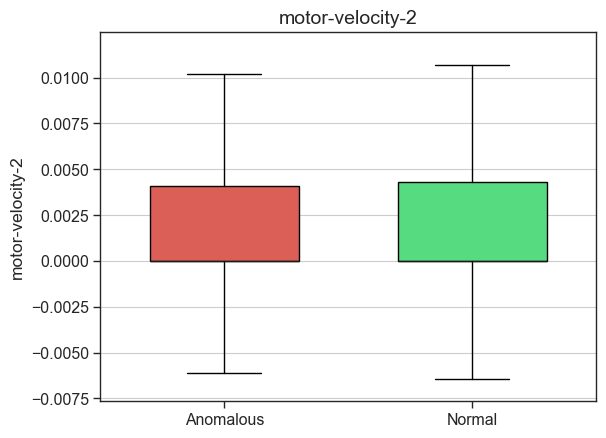

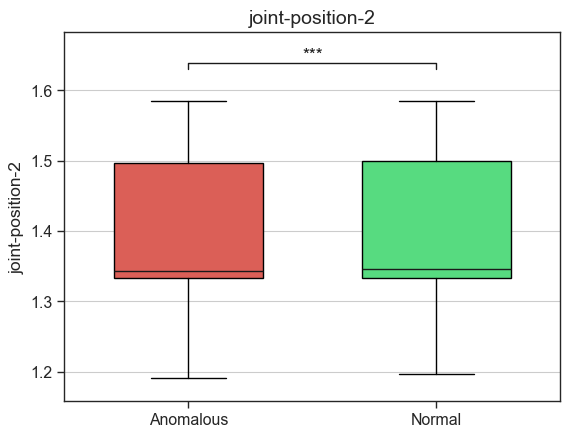

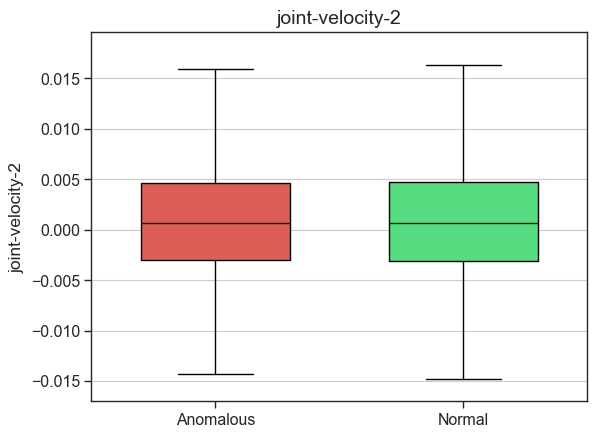

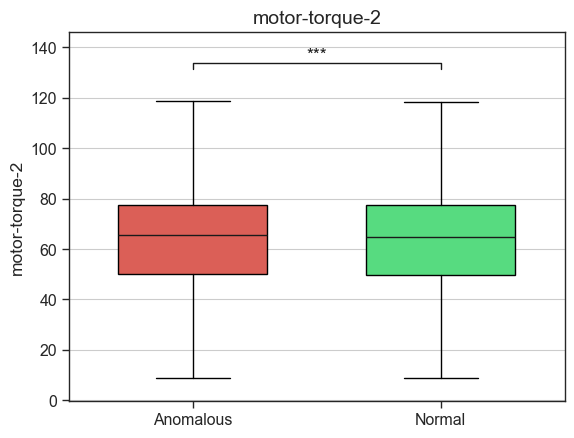

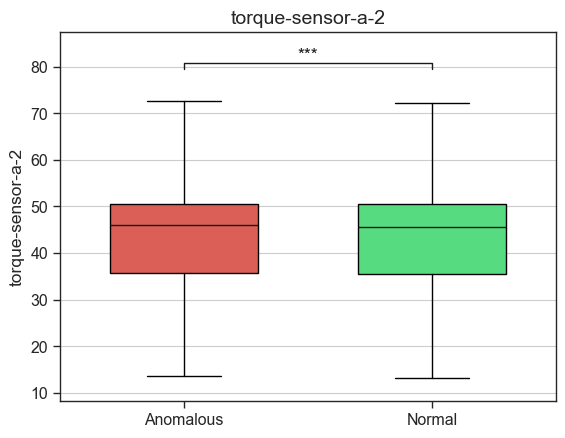

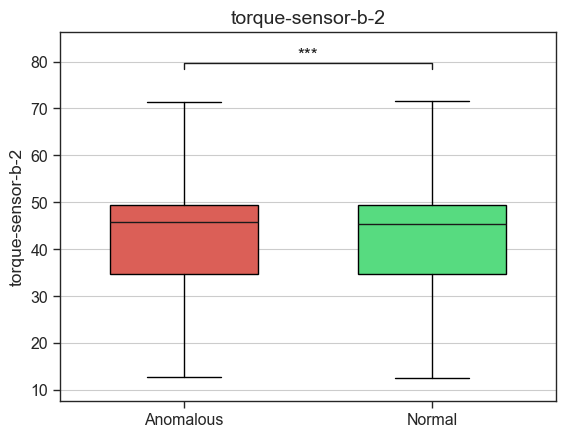

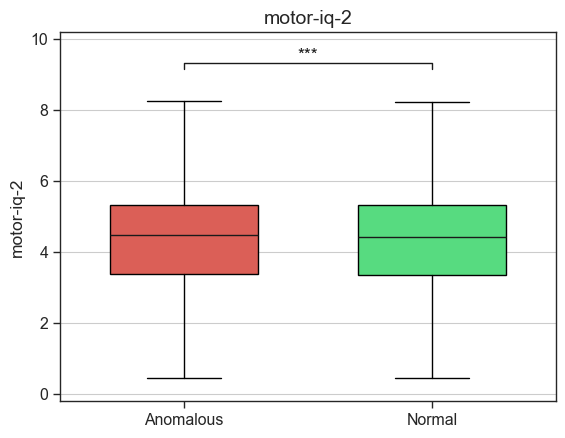

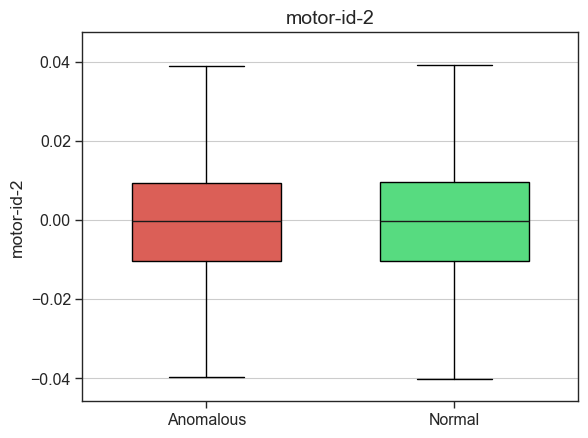

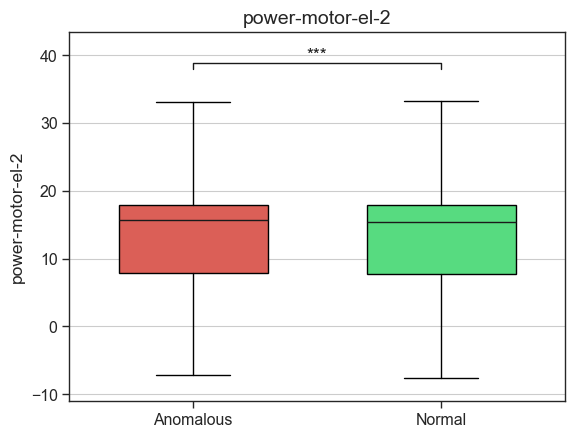

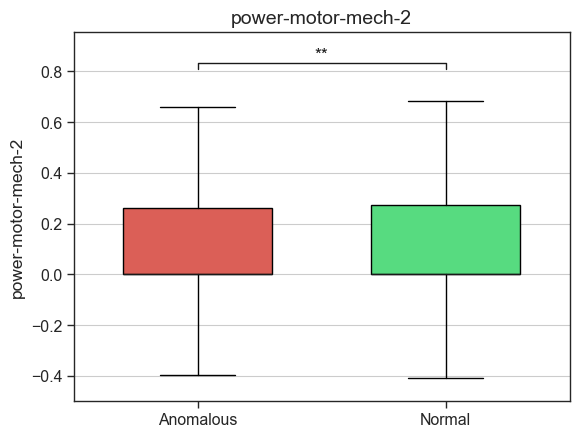

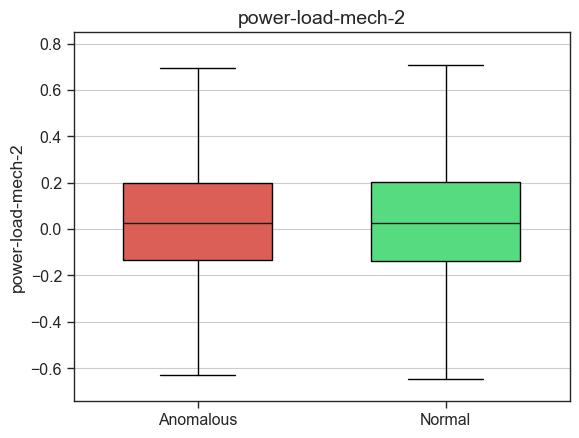

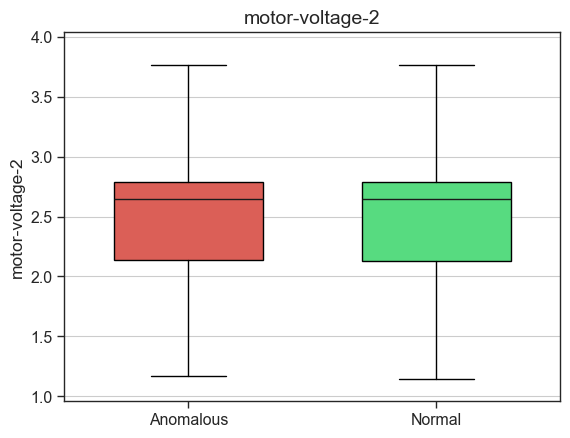

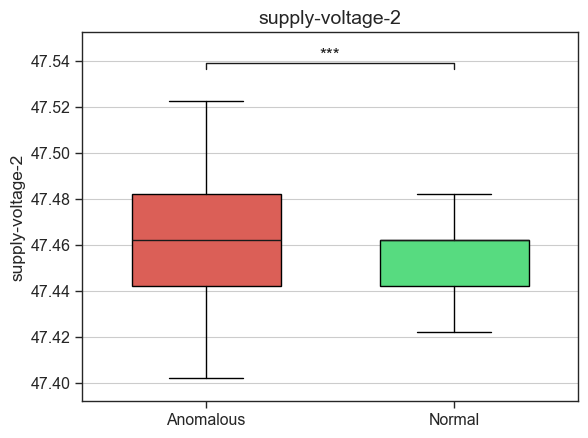

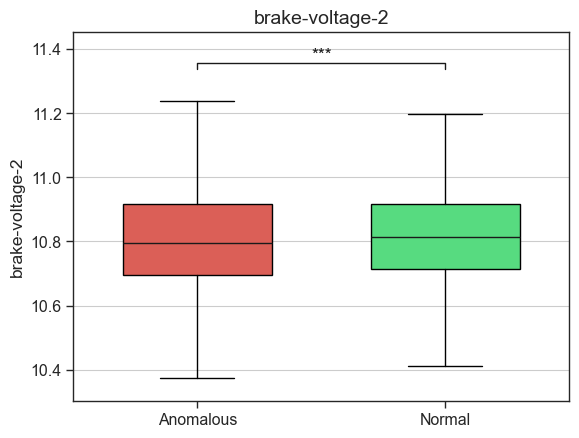

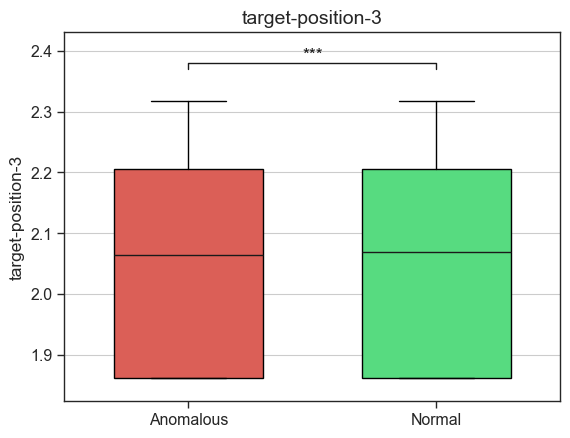

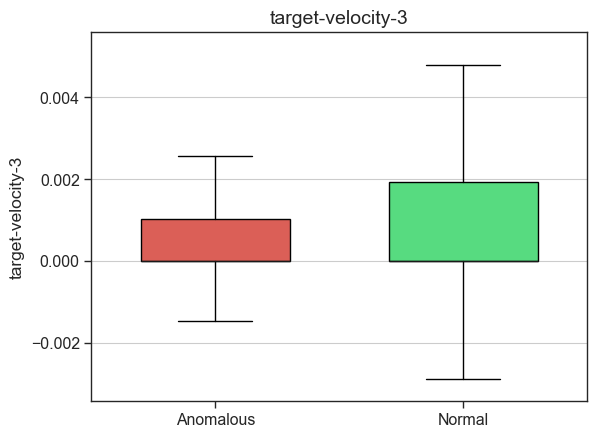

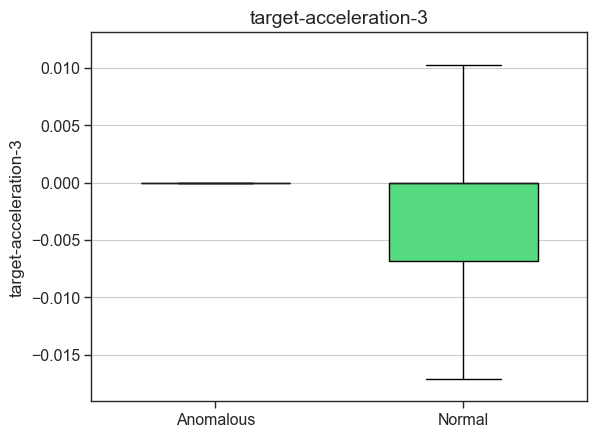

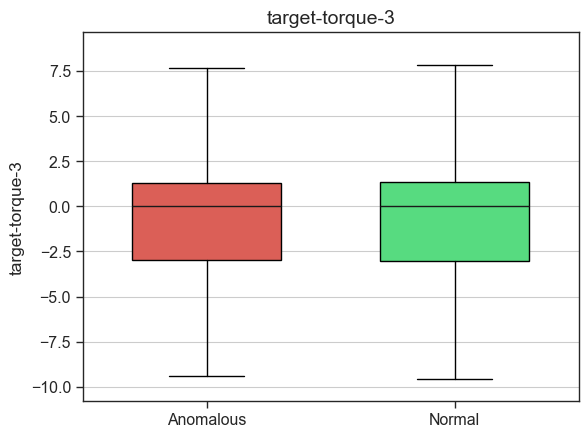

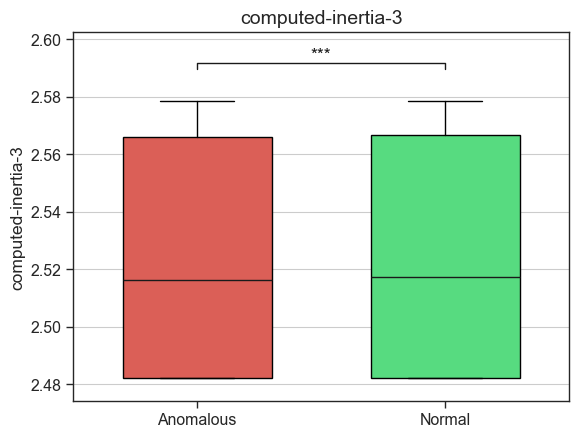

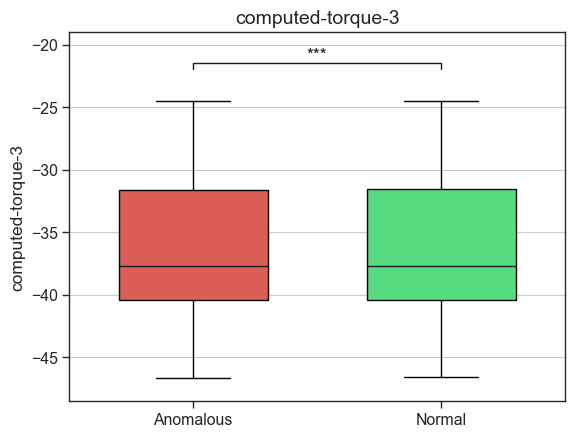

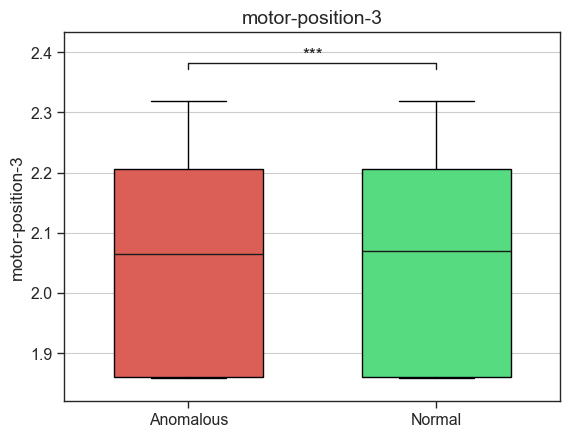

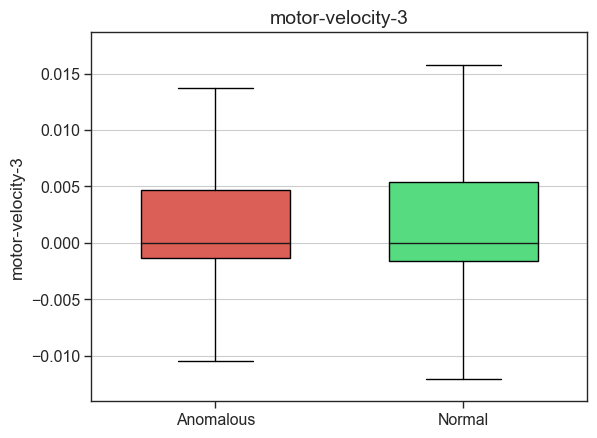

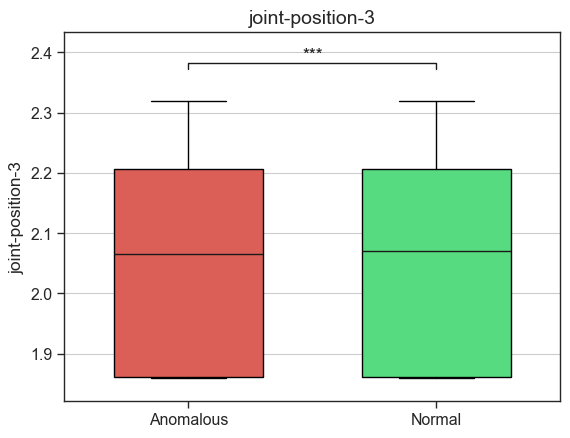

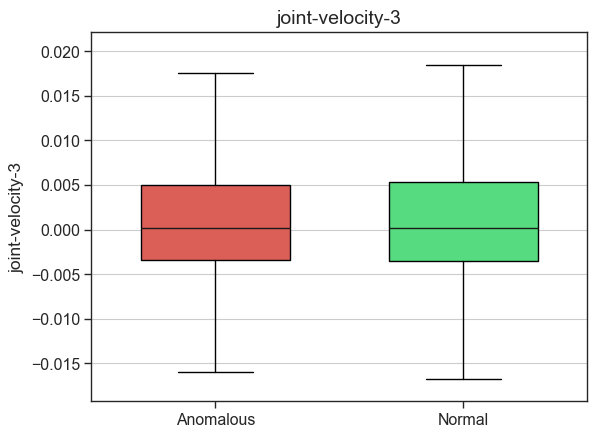

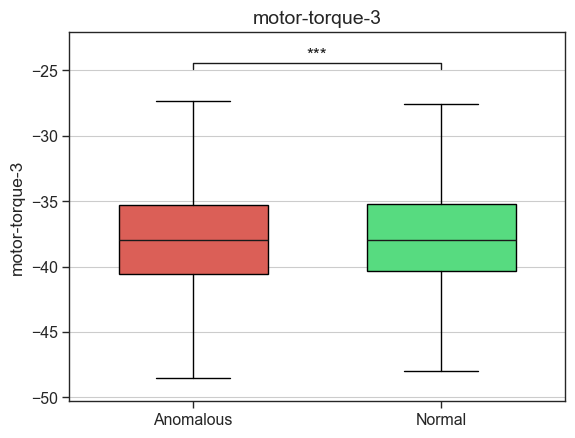

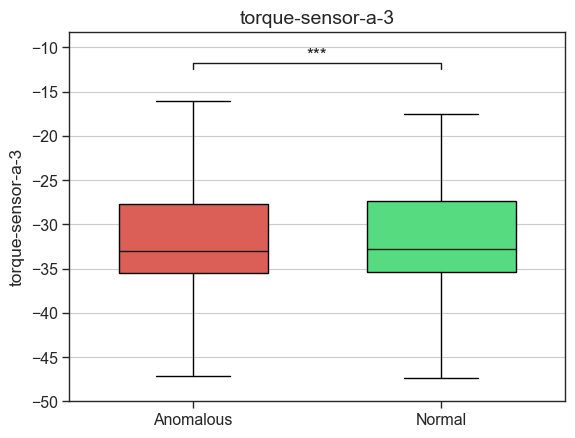

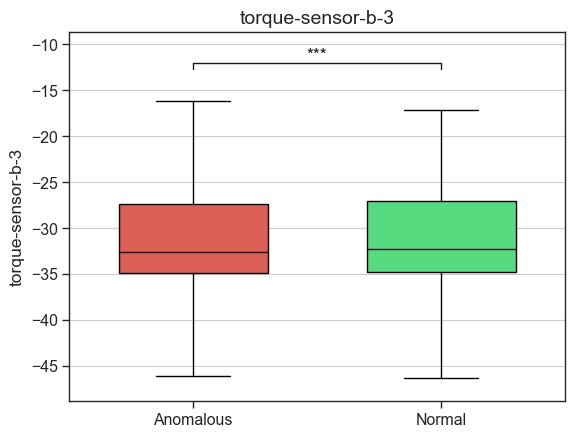

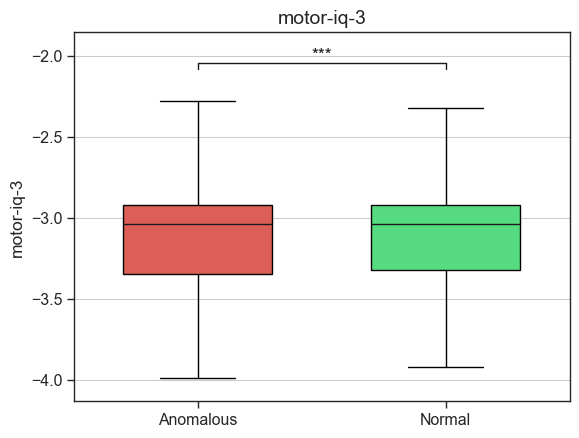

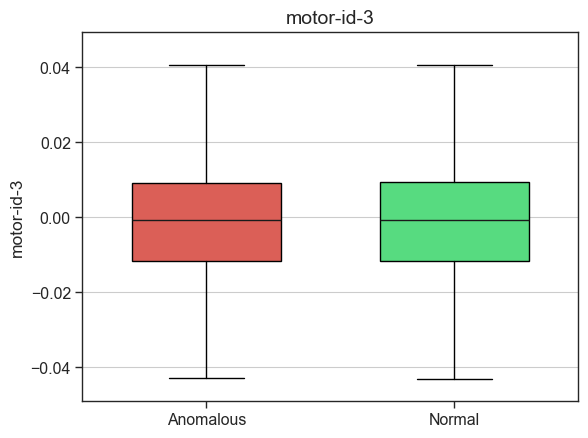

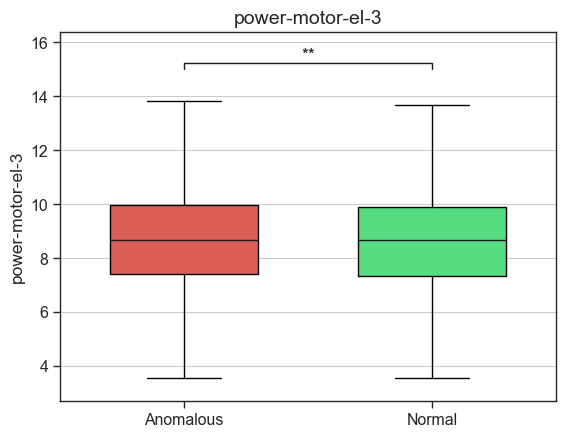

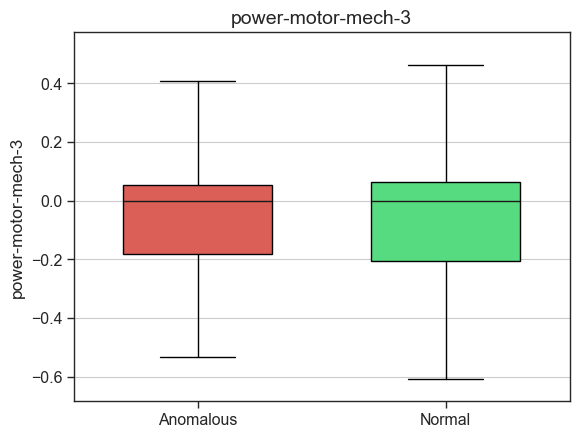

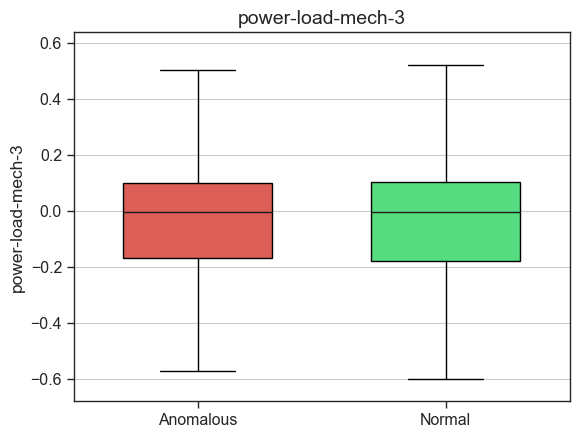

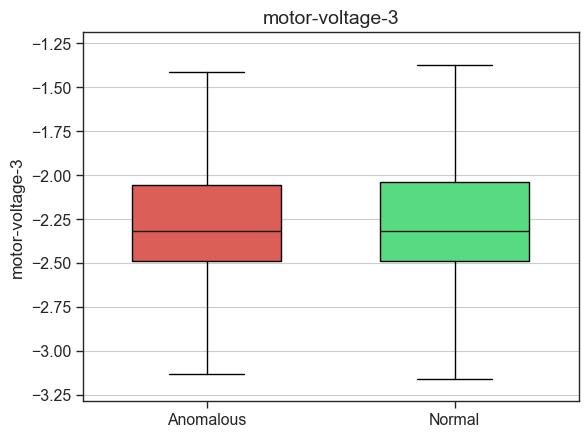

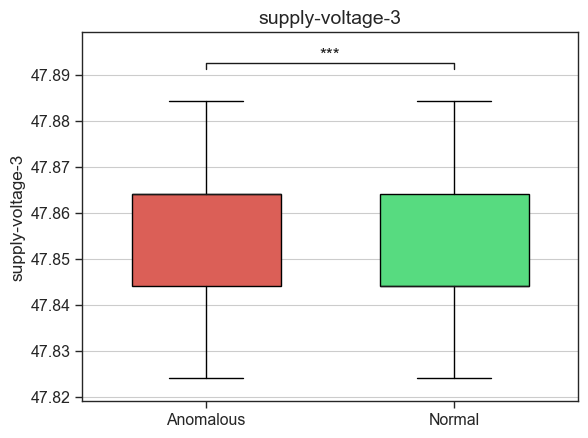

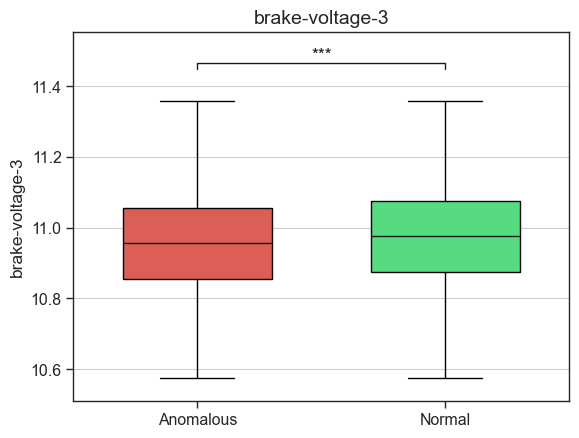

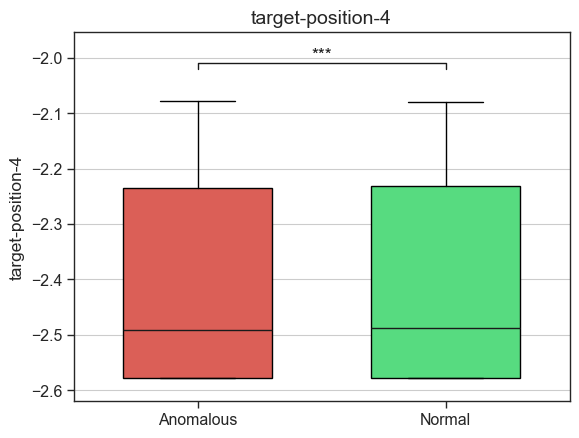

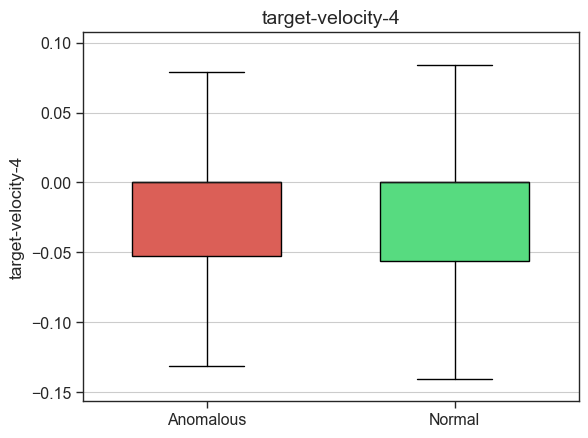

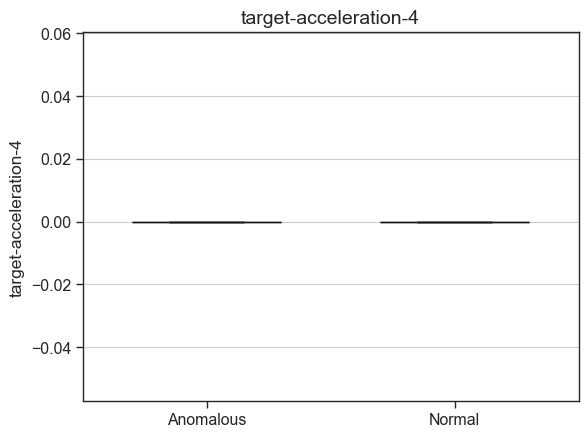

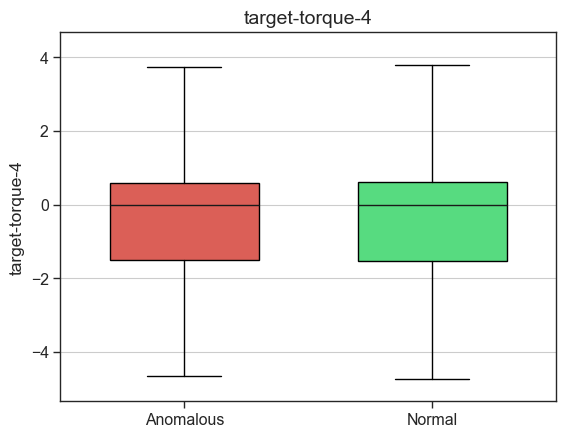

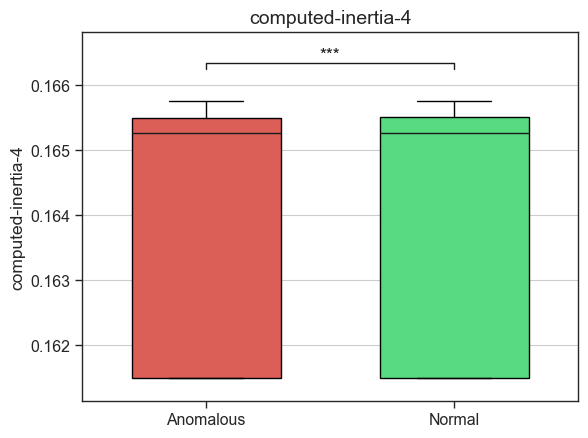

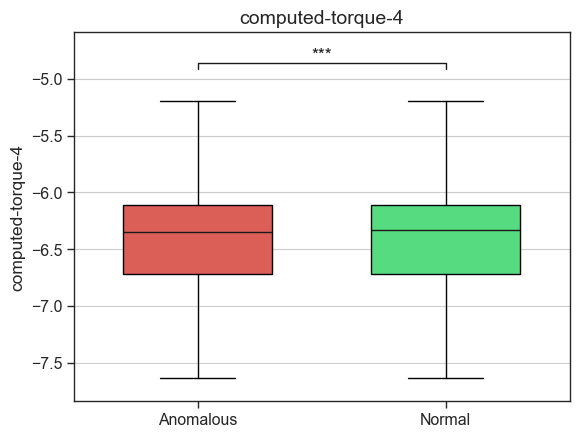

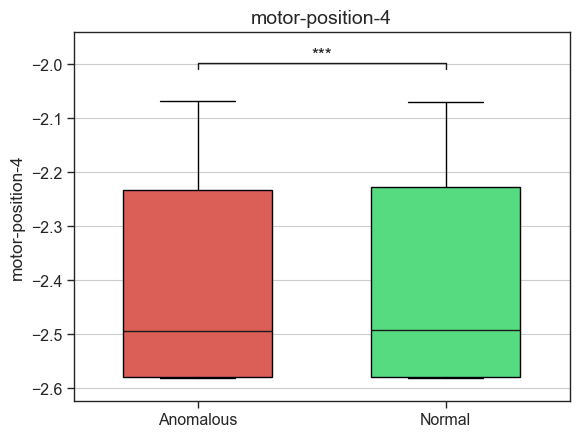

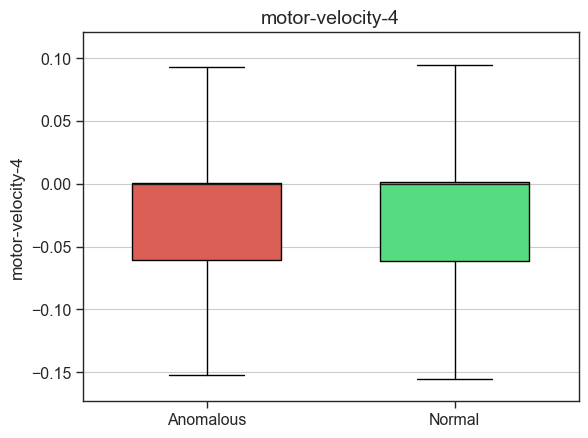

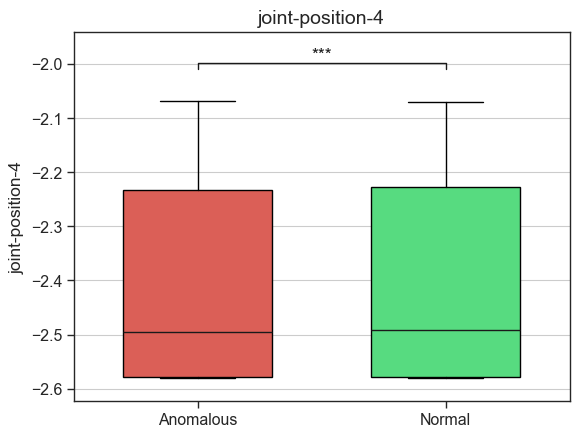

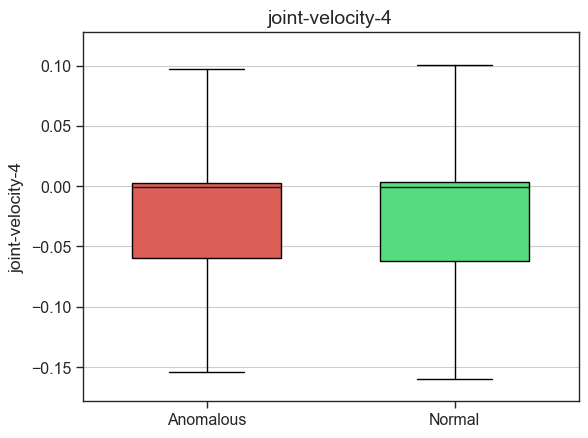

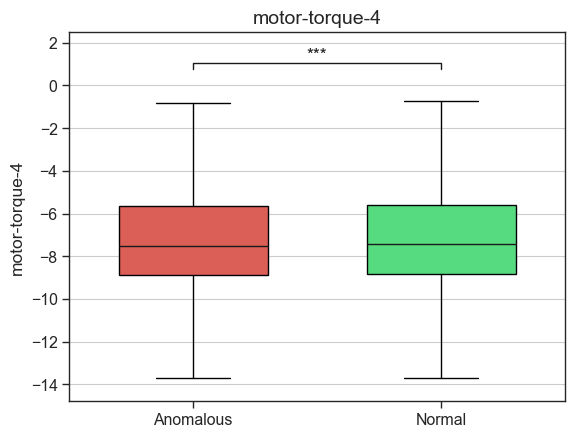

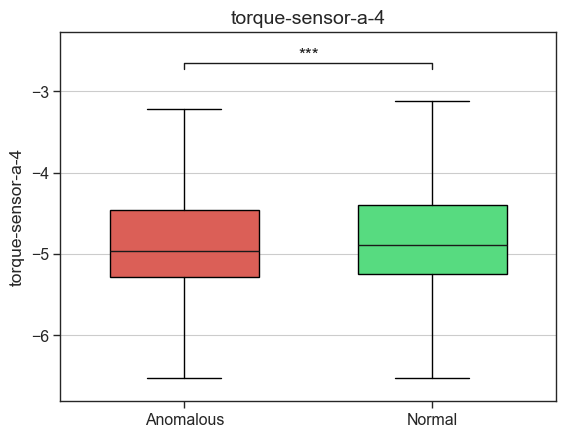

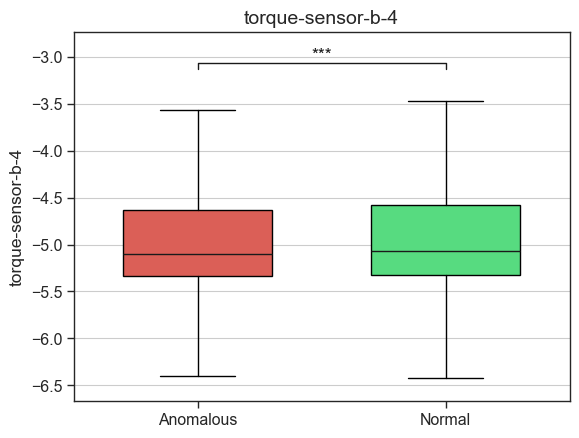

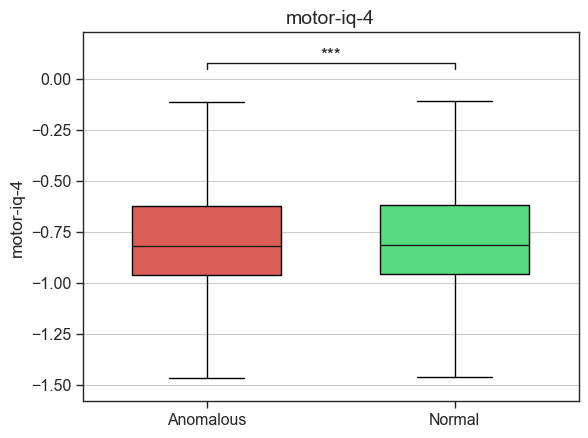

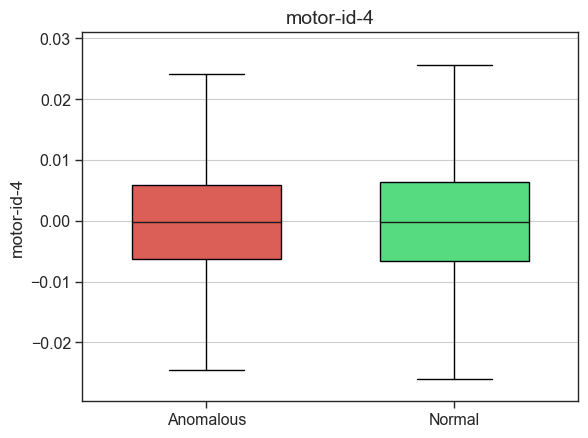

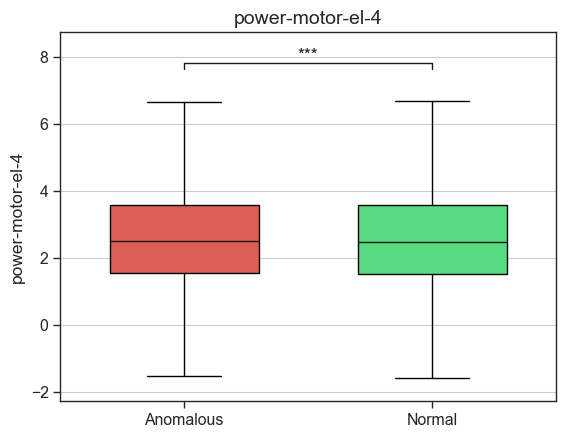

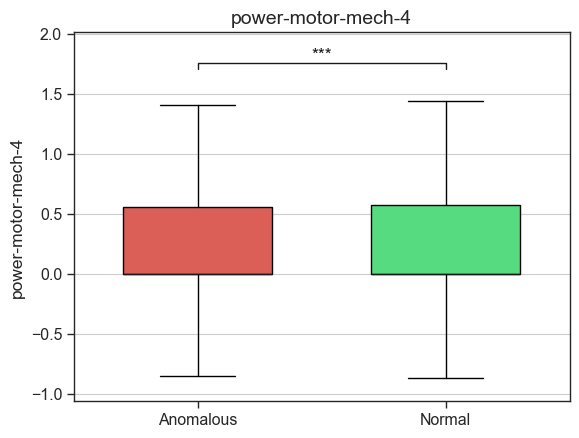

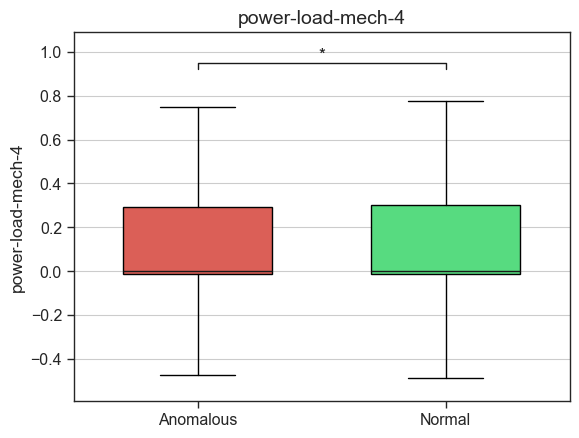

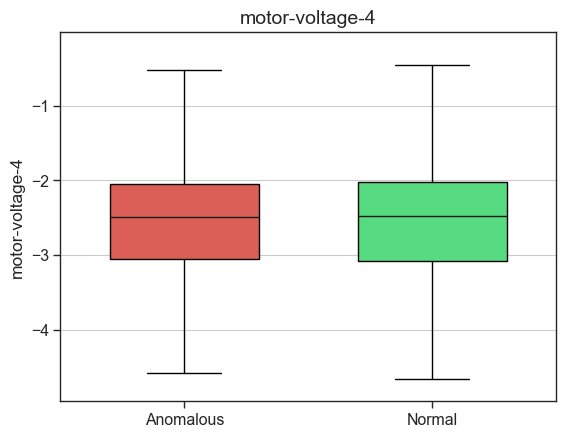

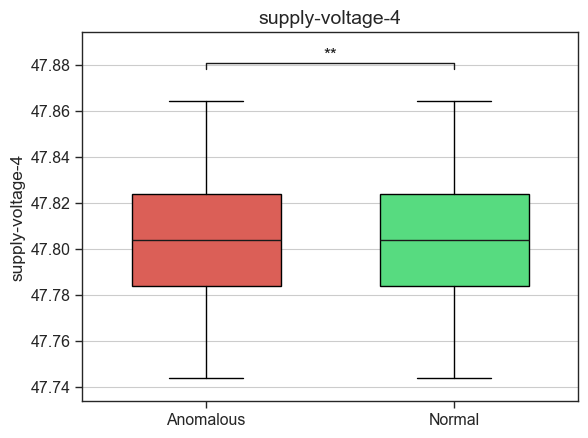

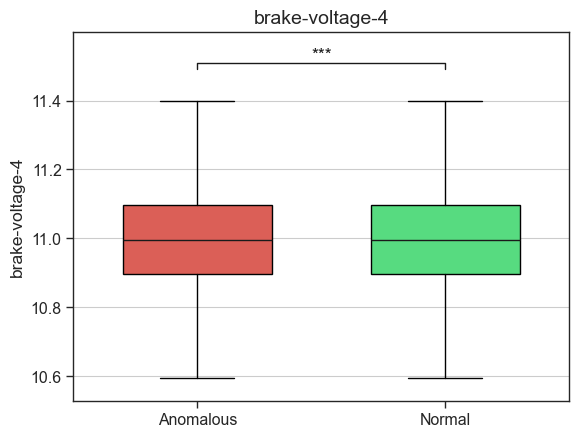

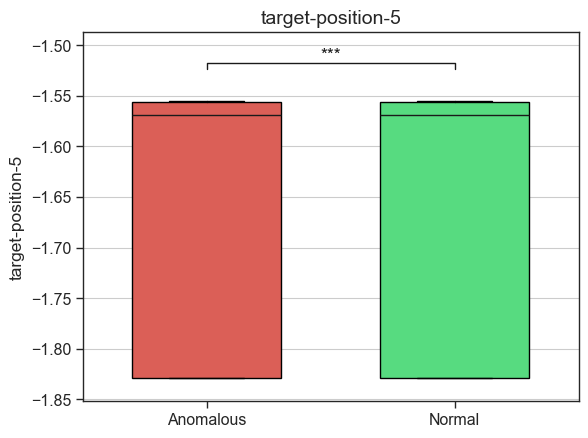

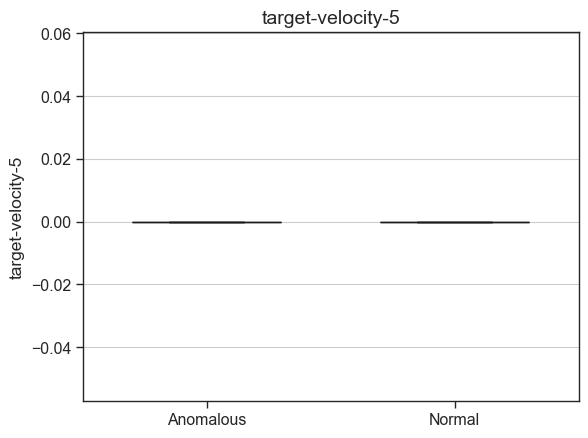

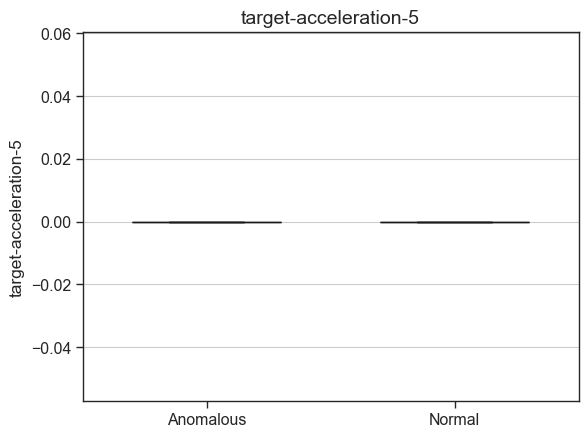

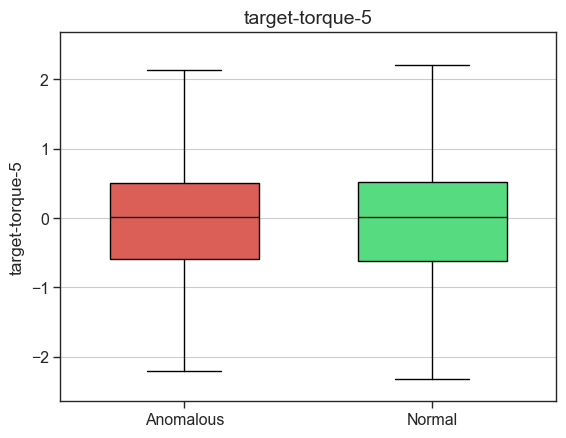

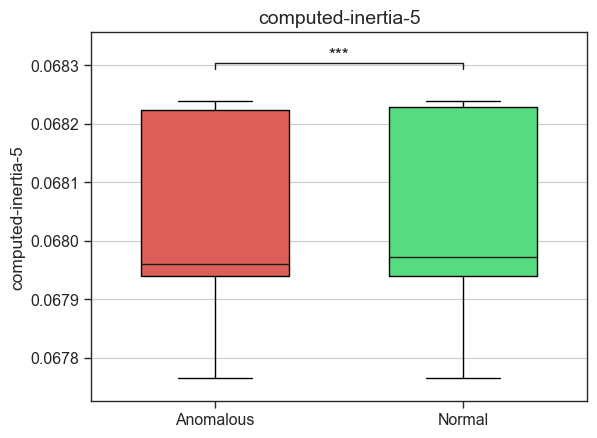

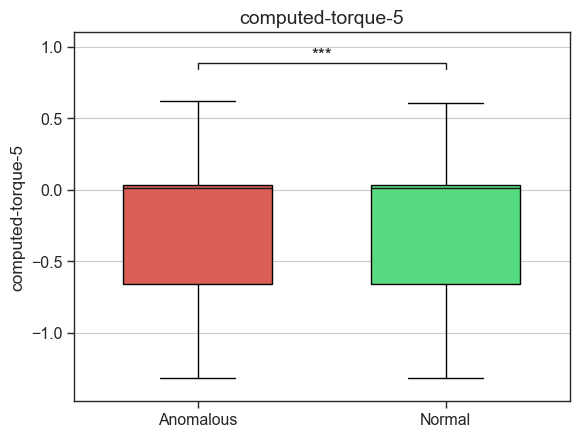

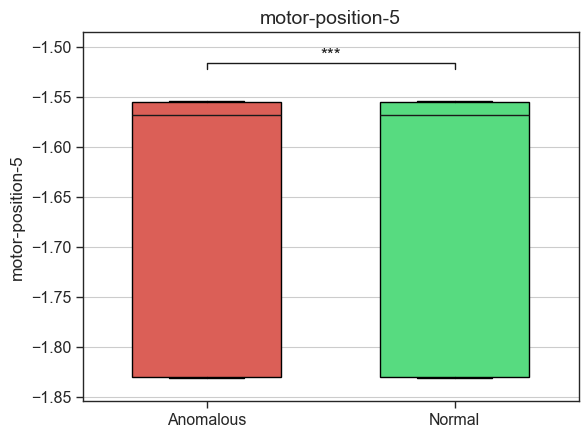

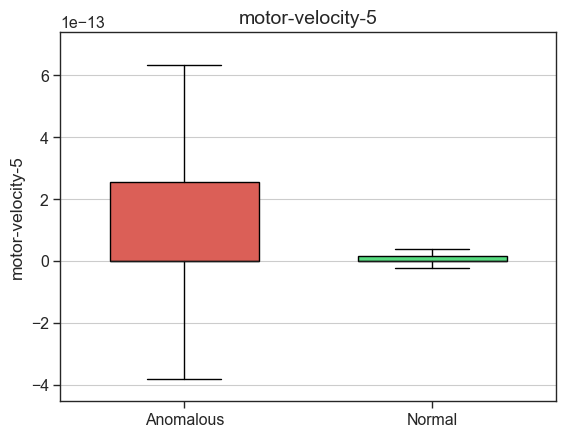

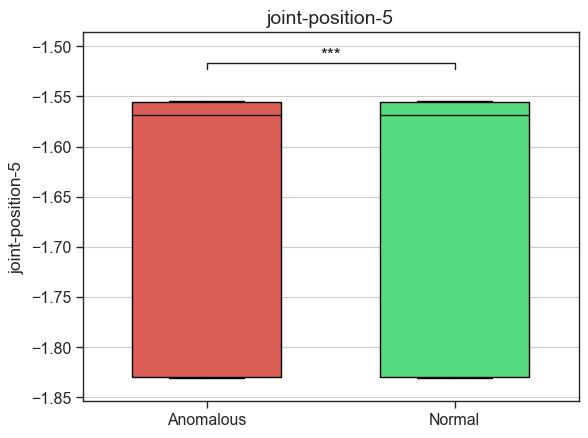

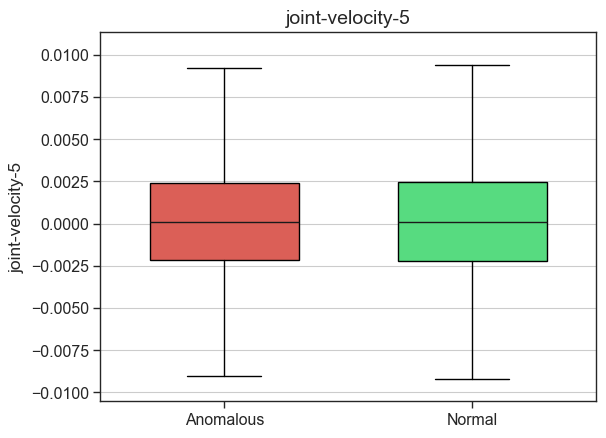

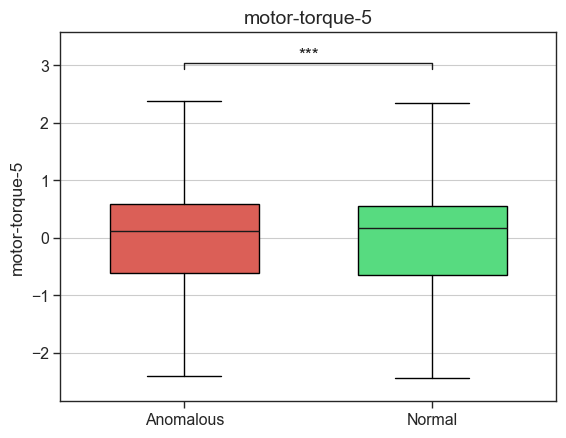

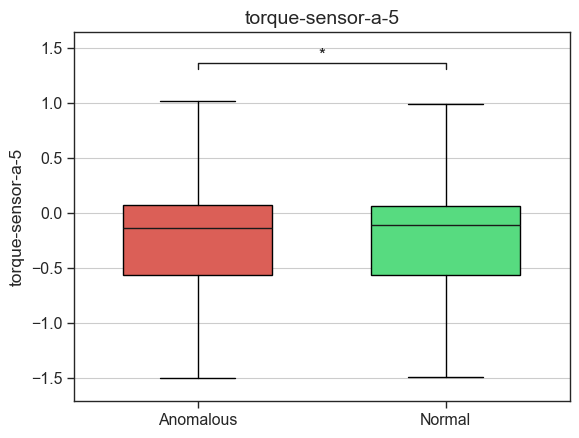

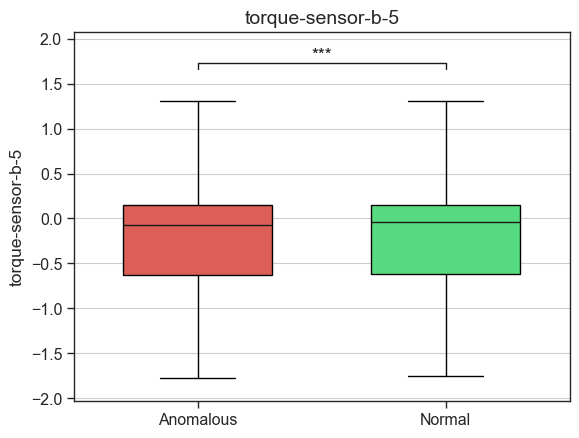

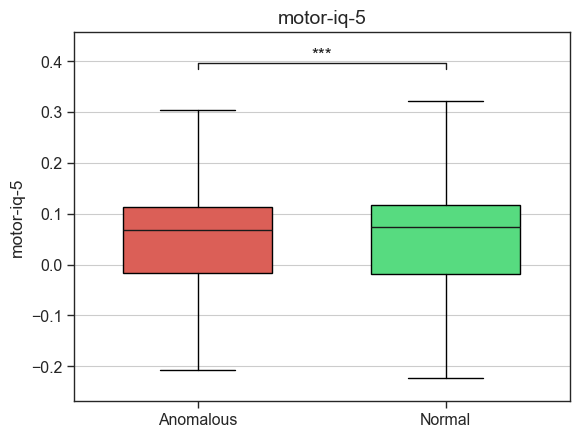

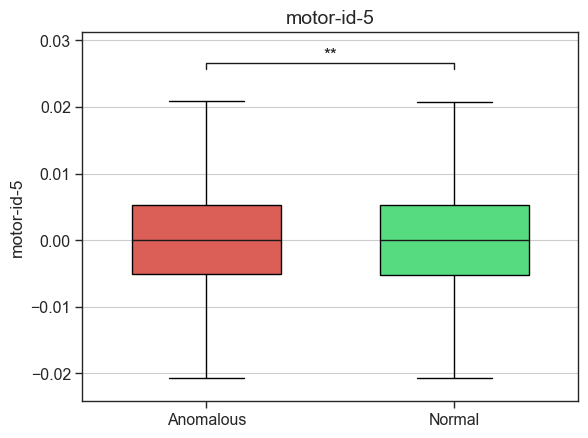

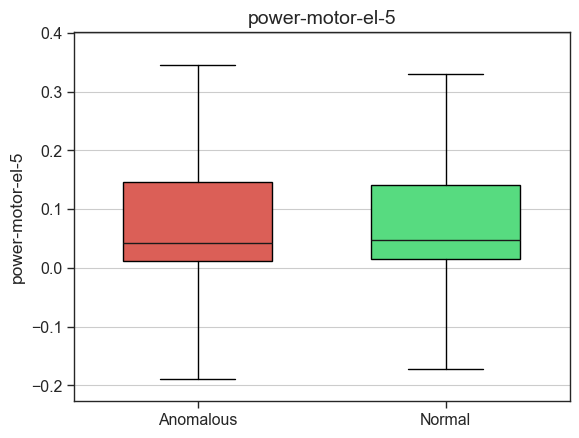

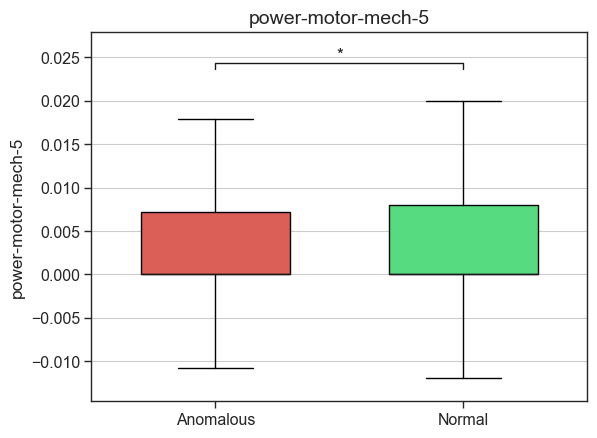

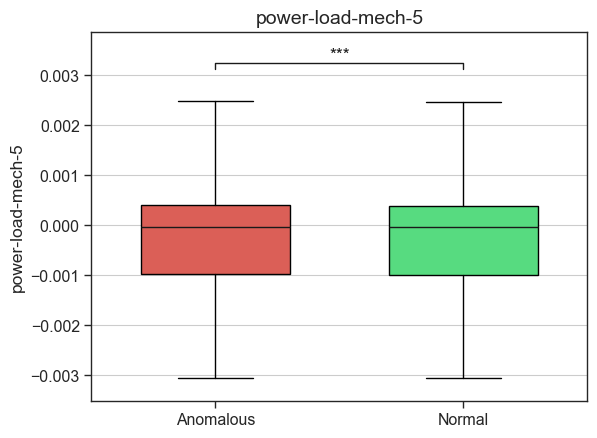

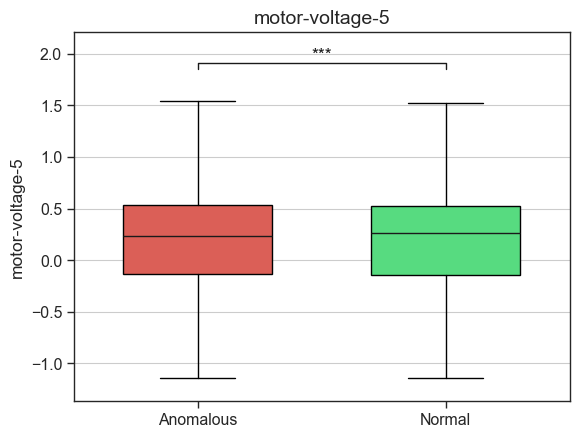

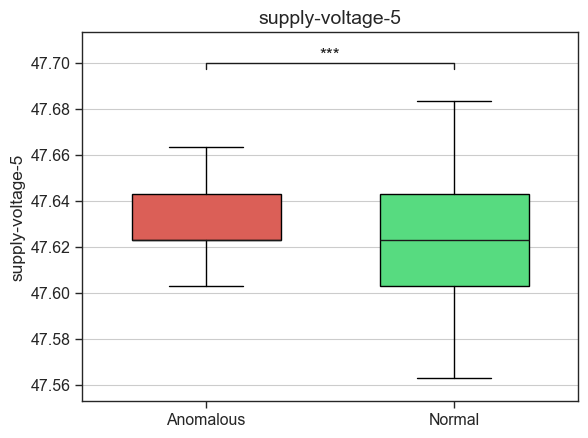

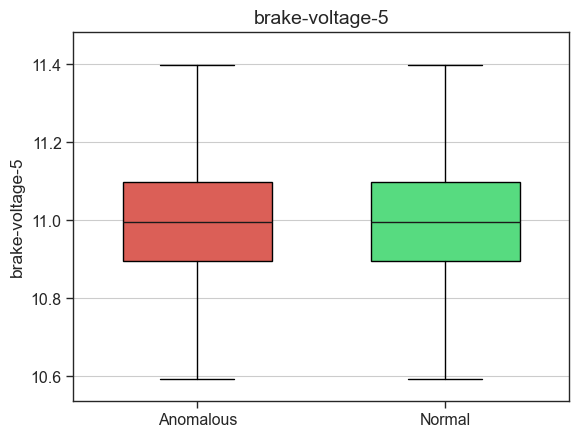

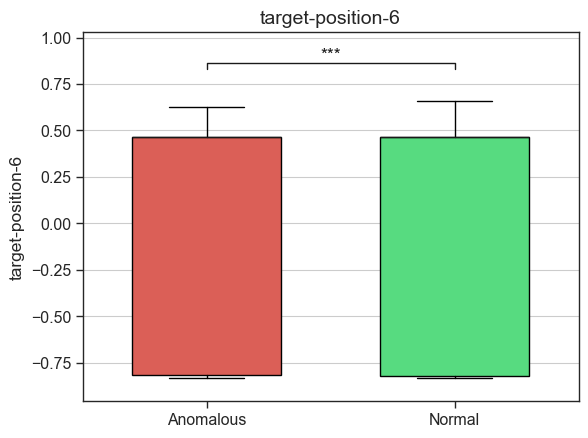

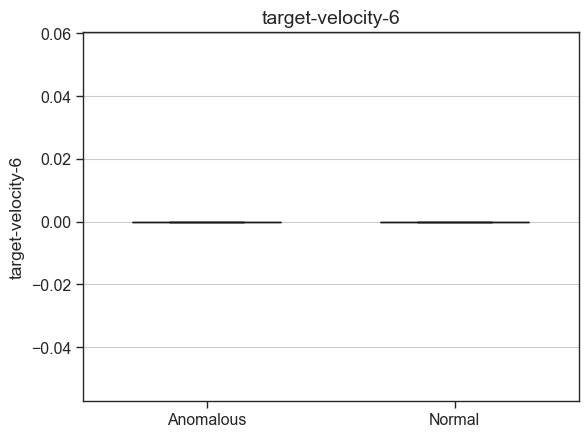

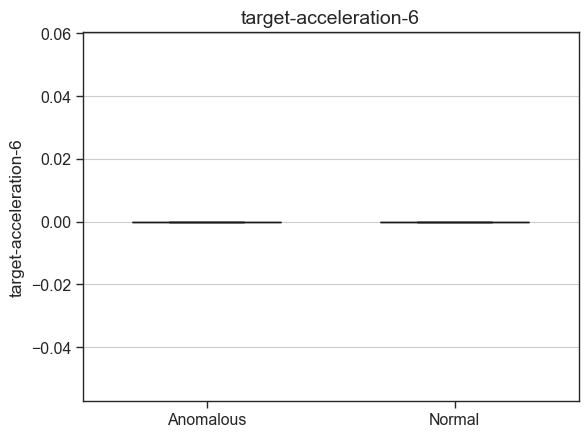

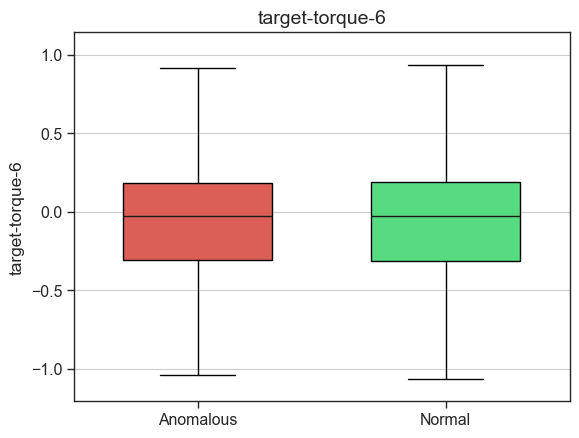

/Users/khoimai/Documents/repo/collection/StatisticalLearning/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


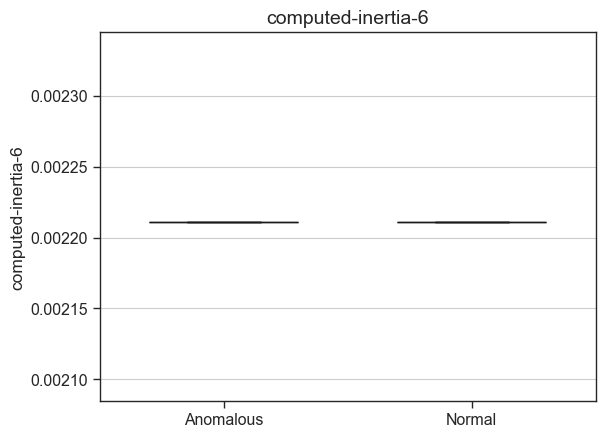

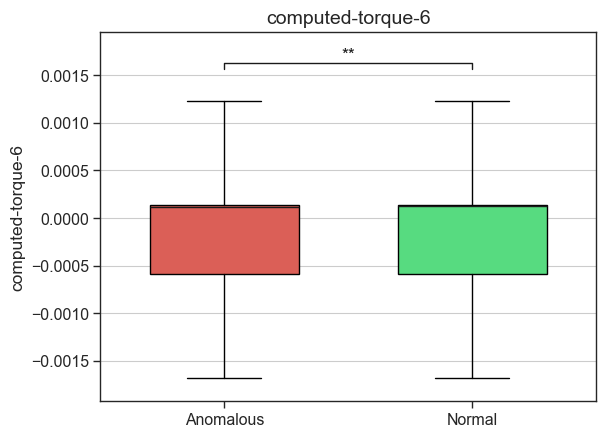

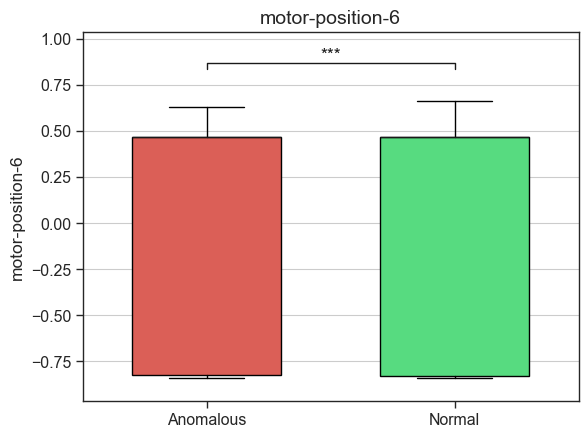

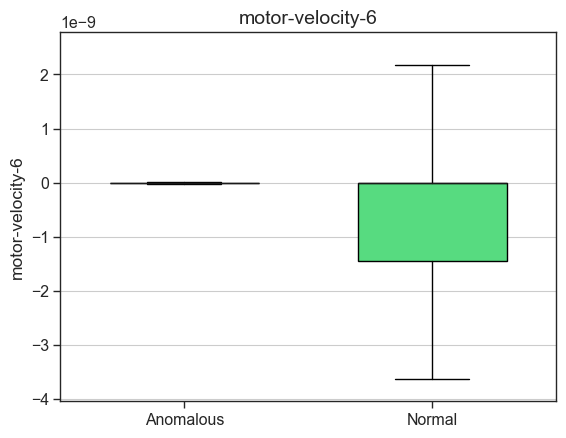

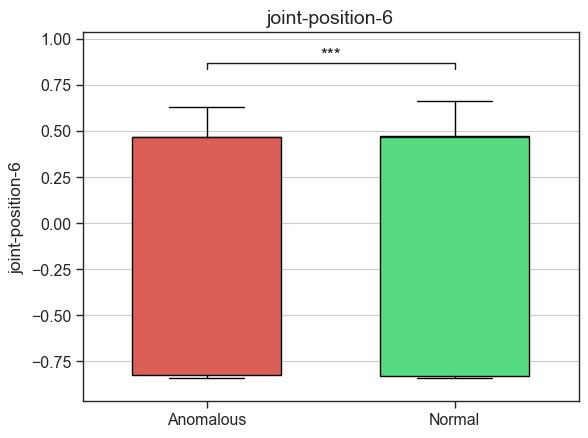

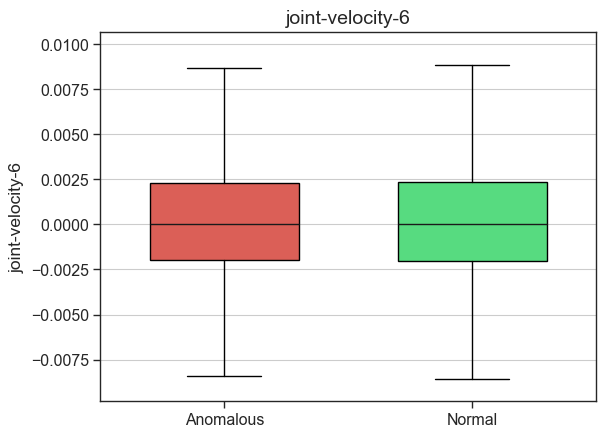

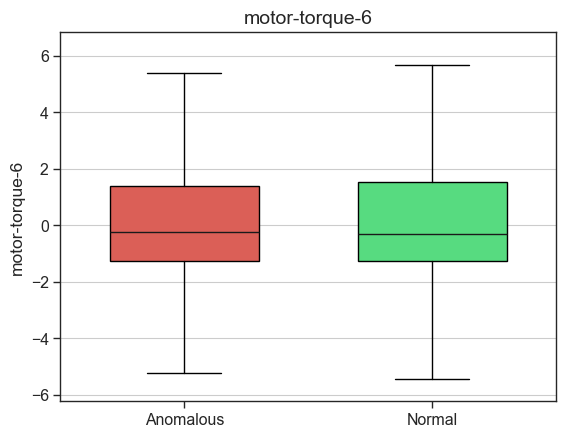

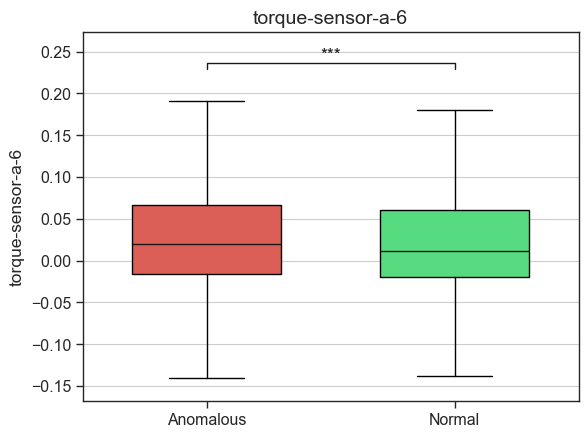

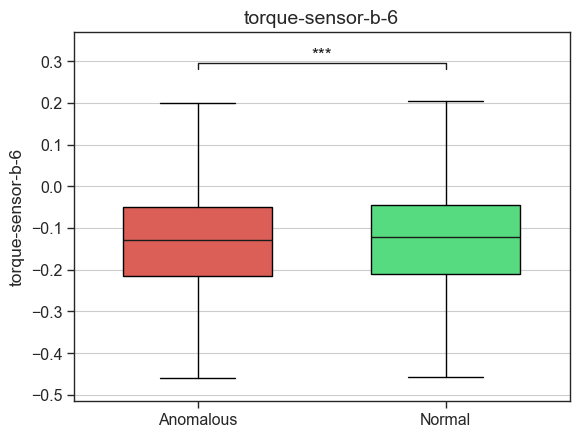

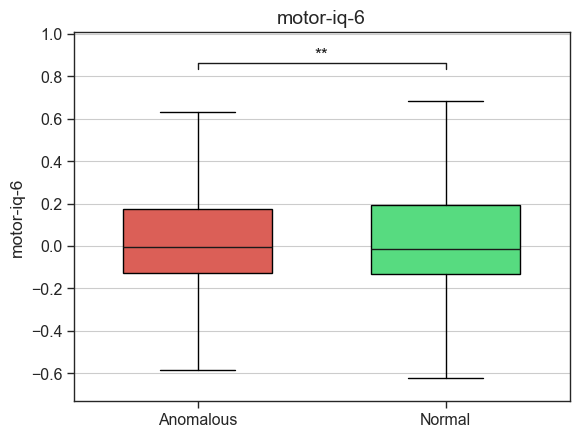

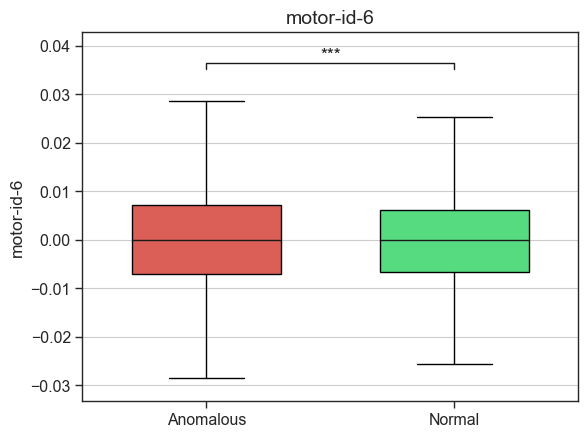

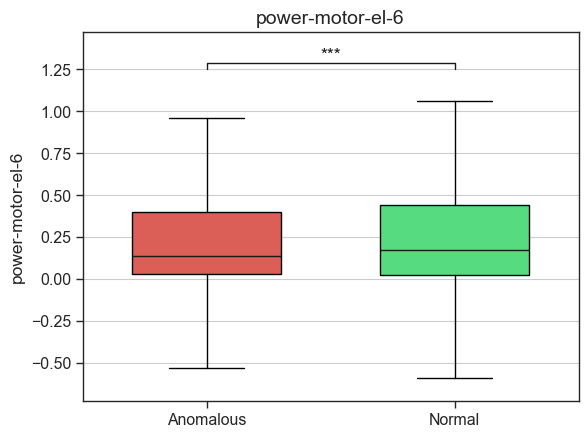

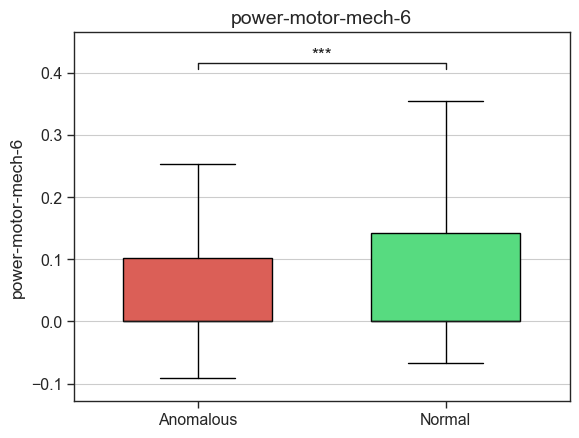

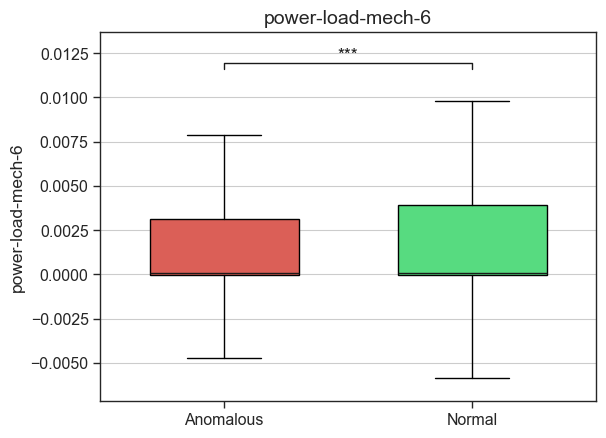

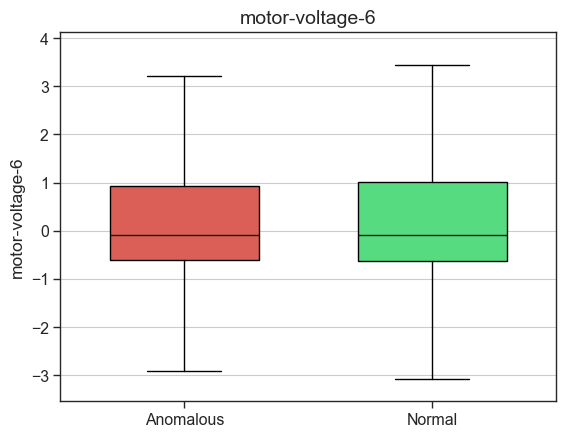

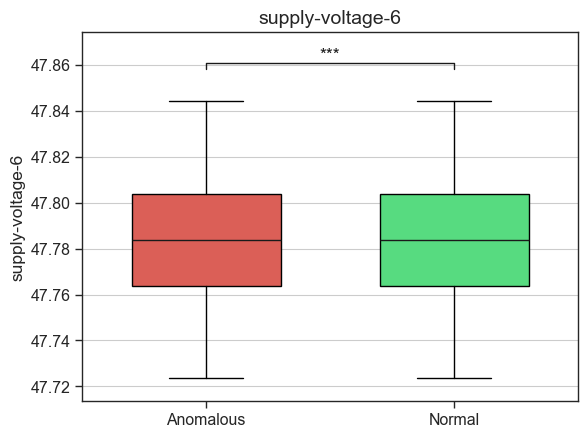

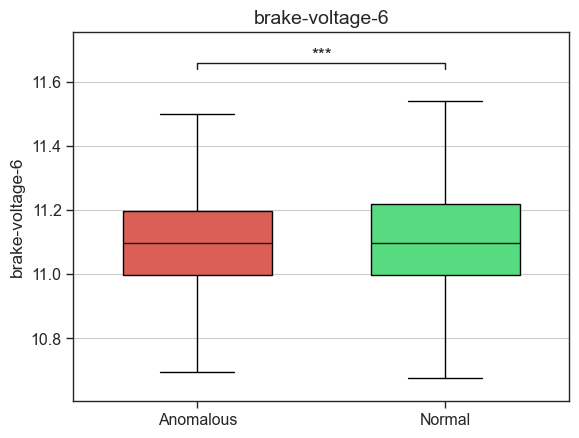

In [12]:
# Get the list of all columns in the dataset except 'anomaly'

columns = df.columns.tolist()
columns.remove('anomaly')

# Create a boxplot for each column in the dataset
p_values = {}
for column in columns:
    ft = column.replace('_', '-')
    xticklabels = ['Anomalous', 'Normal']
    p_values[column] = plot_boxplot(df, column, ft, ft, xticklabels, save=True)

In [14]:
p_values

{'robot_voltage': [0.0],
 'robot_current': [9.078282936967046e-48],
 'io_current': [0.0],
 'system_current': [2.308605100078454e-31],
 'target_position_1': [7.562472512612289e-15],
 'target_velocity_1': [0.9999996878478637],
 'target_acceleration_1': [0.999999993074097],
 'target_torque_1': [0.9235643542315826],
 'computed_inertia_1': [3.9554310534028466e-32],
 'computed_torque_1': [0.9827021050409268],
 'motor_position_1': [2.5208747573515606e-14],
 'motor_velocity_1': [0.9931068680938333],
 'joint_position_1': [8.705588073674706e-15],
 'joint_velocity_1': [0.991170492804978],
 'motor_torque_1': [3.614456012310621e-06],
 'torque_sensor_a_1': [7.218946393788708e-07],
 'torque_sensor_b_1': [6.74160323994341e-12],
 'motor_iq_1': [0.0082941599039049],
 'motor_id_1': [0.02094463570723115],
 'power_motor_el_1': [2.3323548317632913e-88],
 'power_motor_mech_1': [1.0030518081698306e-76],
 'power_load_mech_1': [0.02256935084275961],
 'motor_voltage_1': [0.15211767191612952],
 'supply_voltage_1'

In [18]:
# convert the p-values to a DataFrame

p_values_df = pd.DataFrame(p_values, index=['p-value']).T
p_values_df

# save the p-values to a CSV file
p_values_df.to_csv('data_binary_anomaly_vs_normal/p_values.csv')

## Correlation

In [9]:
p_values_df = pd.read_csv('data_binary_anomaly_vs_normal/p_values.csv',index_col=0)
p_values_df

p-value
robot_voltage        0.000000e+00
robot_current        9.078283e-48
io_current           0.000000e+00
system_current       2.308605e-31
target_position_1    7.562473e-15
...                           ...
power_motor_mech_6   7.918110e-06
power_load_mech_6   1.271167e-101
motor_voltage_6      6.739856e-01
supply_voltage_6     2.910698e-04
brake_voltage_6      1.121396e-08

[130 rows x 1 columns]

In [15]:
# Filter features with p-value less than 0.001 (***)
selected_fts_significant = p_values_df[p_values_df['p-value'] < 0.001]
print('Number of significant features:', selected_fts_significant.size)

# Sort by p-value
selected_fts_significant = selected_fts_significant.sort_values(by='p-value')

# Get top 20 features
selected_fts_significant = selected_fts_significant.head(20)
top_20_features = selected_fts_significant.index.tolist()

print("Top 20 significant features:", top_20_features)

# selected_fts_significant_columns = selected_fts_significant.index.tolist()
# print('Number of significant features:', len(selected_fts_significant_columns))

Number of significant features: 72
Top 20 significant features: ['robot_voltage', 'supply_voltage_2', 'torque_sensor_a_3', 'torque_sensor_b_6', 'torque_sensor_b_3', 'supply_voltage_5', 'io_current', 'torque_sensor_a_4', 'supply_voltage_3', 'torque_sensor_a_6', 'torque_sensor_b_4', 'brake_voltage_2', 'brake_voltage_3', 'power_load_mech_6', 'power_motor_el_1', 'supply_voltage_1', 'torque_sensor_b_5', 'torque_sensor_b_2', 'power_motor_mech_1', 'motor_iq_2']


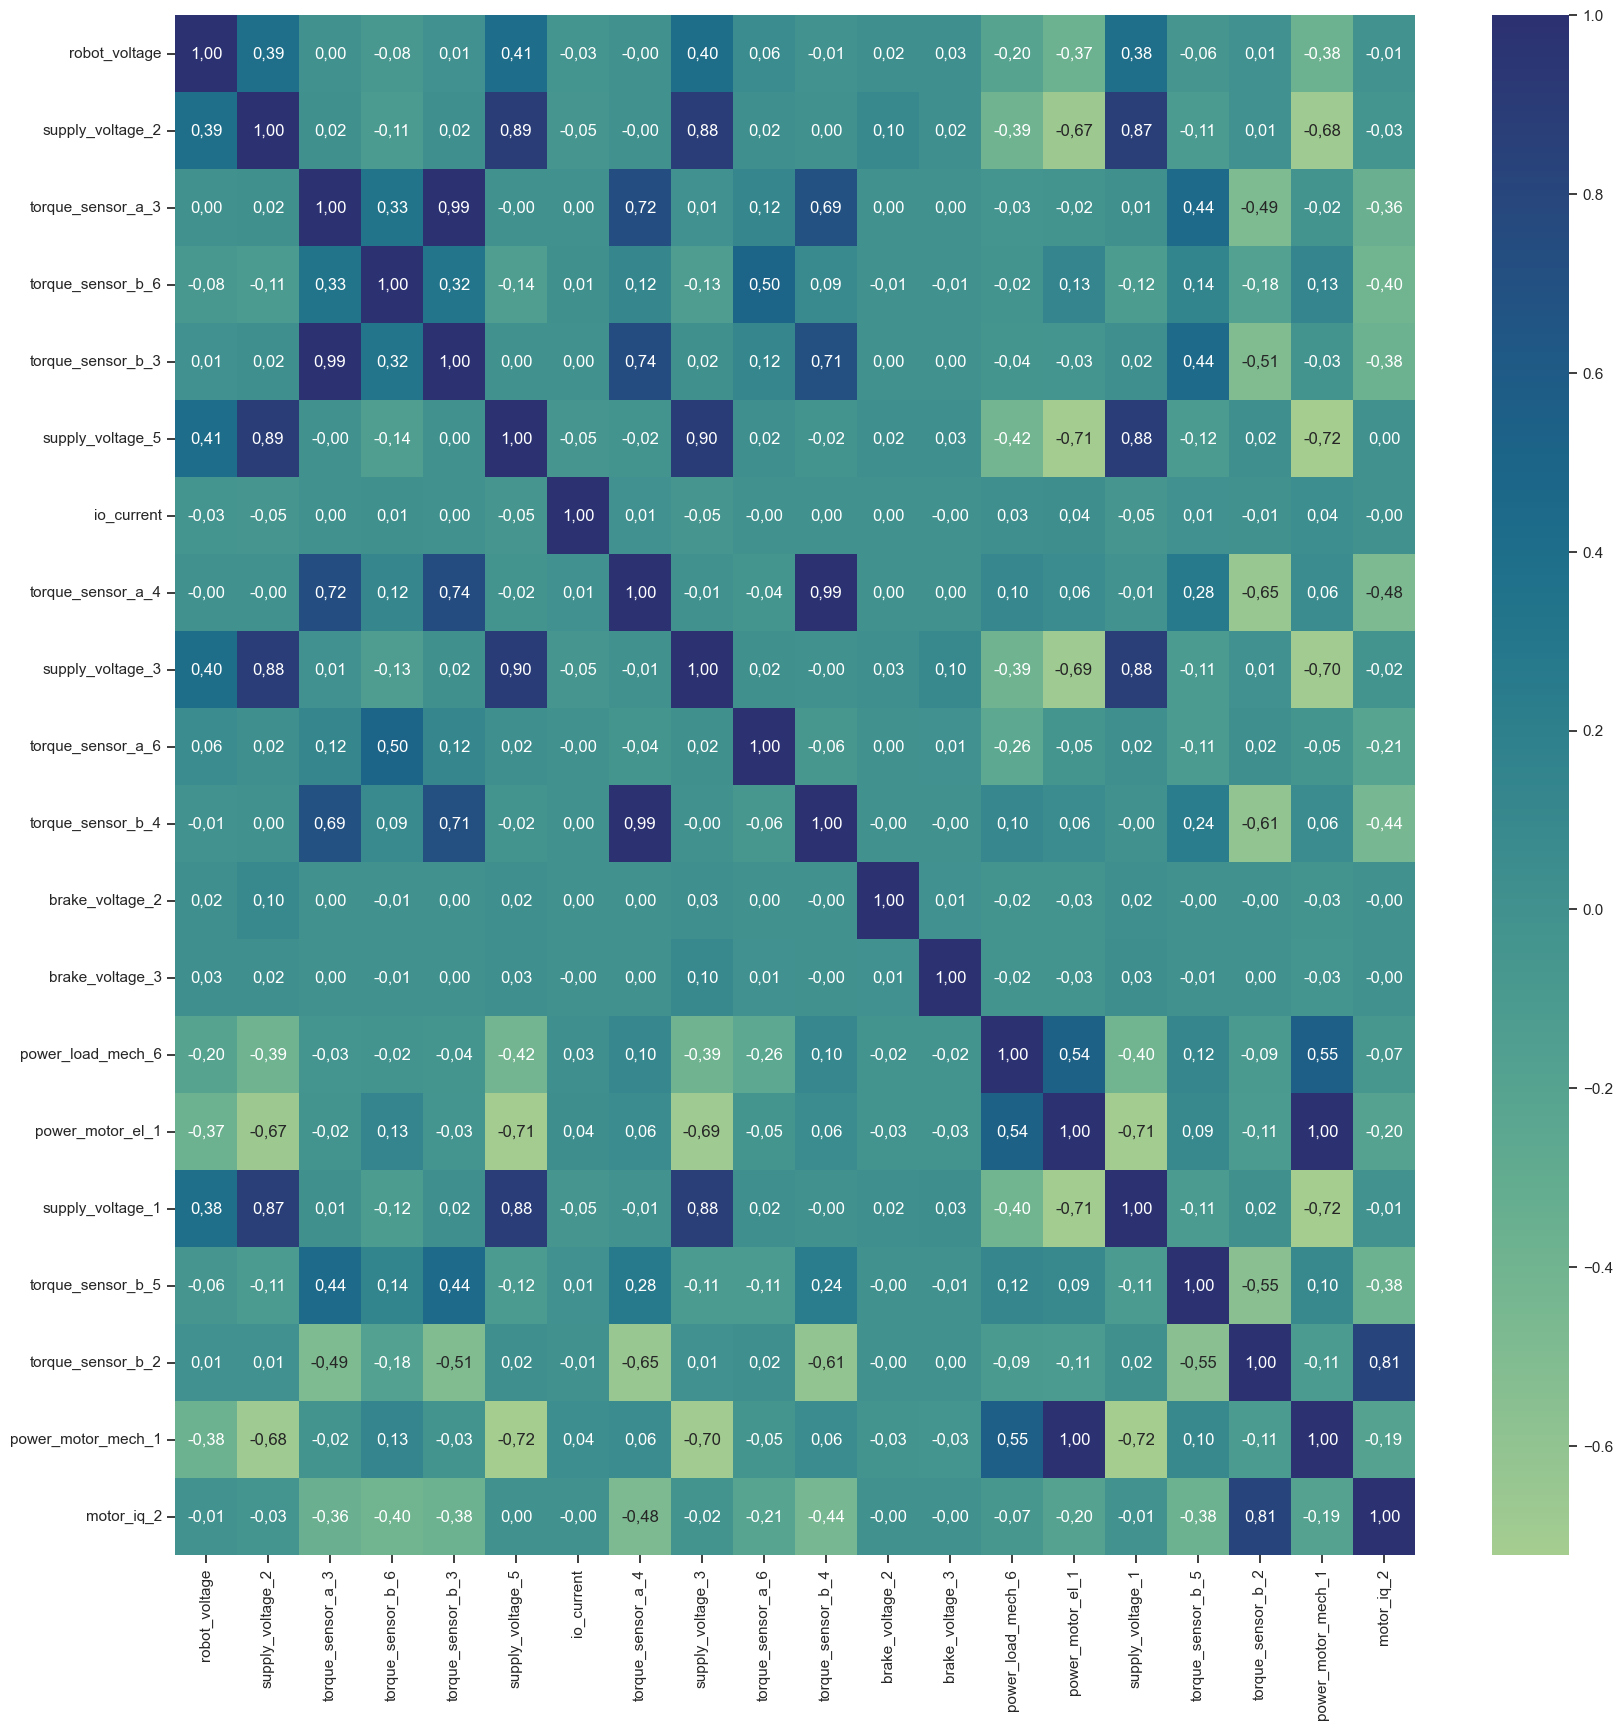

In [16]:
df_corr = df[top_20_features].corr()

# Save matrix of p-values
df_p = pd.DataFrame()  
for x in df_corr.columns:
    for y in df_corr.columns:
        corr = stats.pearsonr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

corr_formatted = df_corr.applymap(lambda x: f"{x:.2f}".replace('.', ','))

sns.set(style="ticks")
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, cmap="crest", annot=corr_formatted, fmt="")

# save png
if os.path.exists('figures/corr'):
    pass
else:
    os.makedirs('figures/corr')
    
plt.yticks(va='center')

plt.savefig('figures/corr/corr_heatmap.png', dpi=1200)
plt.show()

In [17]:
# save pvalues matrix
df_p.to_csv("figures/corr/corr_pvalue.csv")

In [18]:
# save correlation matrix
df_corr.to_csv("figures/corr/corr_value.csv")

# RainCloud

In [16]:
def raincloud_plot(ft_column, target_column, data):
    dx = target_column
    dy = ft_column
    ort = "v"
    title = ft_column.replace('_', '-')
    df = data.copy()[[ft_column] + [target_column]]

    df[target_column] = df[target_column].apply(lambda x: 'Anomalous' if x == 1 else 'Normal')
    category_order = ["Anomalous", "Normal"]

    colors = sns.color_palette("hls", 8)
    red = colors[0]
    purple = colors[-2]
    green = colors[3]
    colors_list = [green, red]

    f, ax = plt.subplots()
    sns.set(font="Arial", style="ticks")
    sns.set_context("paper", font_scale=1.5)
    ax=pt.half_violinplot(x = dx, y = dy, data = df, palette = colors_list, bw = .2, cut = 0.,
                        scale = "area", width = .6, inner = None, orient = ort, order = category_order)
    ax=sns.stripplot(x = dx, y = dy, data = df, palette = colors_list, edgecolor = "white",
                    size = 3, jitter = 1, zorder = 0, orient = ort, order = category_order)
    ax=sns.boxplot(x = dx, y = dy, data = df, color = "black", width = .15, zorder = 10,\
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
                showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
                saturation = 1, orient = ort, order = category_order)

    plt.title(title)
    plt.xlabel("")
    plt.ylabel(title)

    # save png
    if os.path.exists("figures/raincloud/"):
        pass
    else:
        os.makedirs("figures/raincloud/")

    plt.savefig(f'figures/raincloud/{title}.png', dpi=1200)

    plt.show()

In [17]:
# top_20_features = ['robot_voltage', 'supply_voltage_2', 'torque_sensor_a_3', 'torque_sensor_b_6', 'torque_sensor_b_3', 'supply_voltage_5', 'io_current', 'torque_sensor_a_4', 'supply_voltage_3', 'torque_sensor_a_6', 'torque_sensor_b_4', 'brake_voltage_2', 'brake_voltage_3', 'power_load_mech_6', 'power_motor_el_1', 'supply_voltage_1', 'torque_sensor_b_5', 'torque_sensor_b_2', 'power_motor_mech_1', 'motor_iq_2']

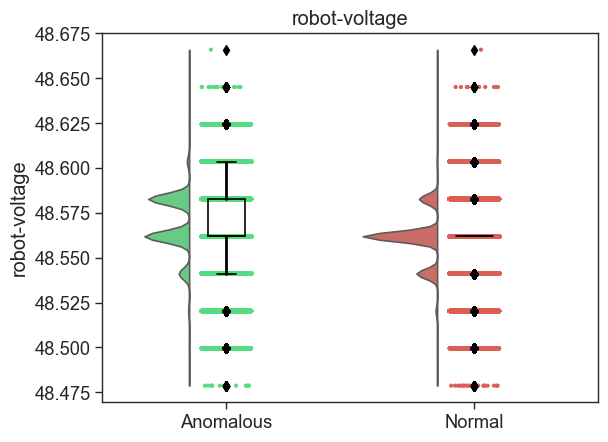

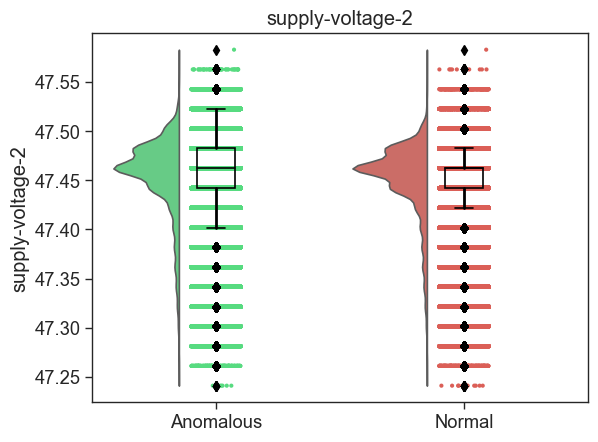

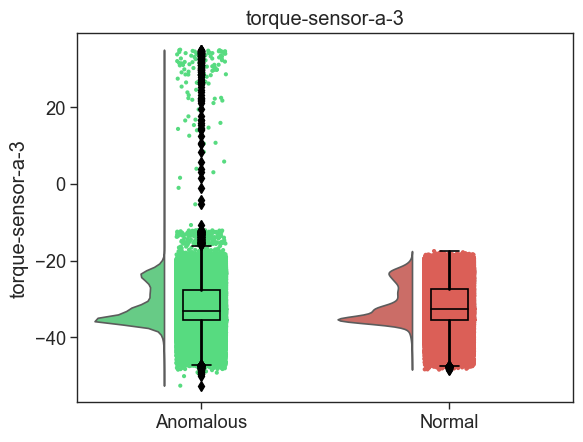

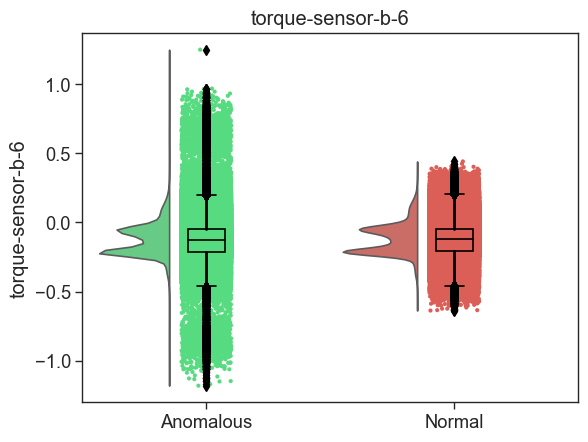

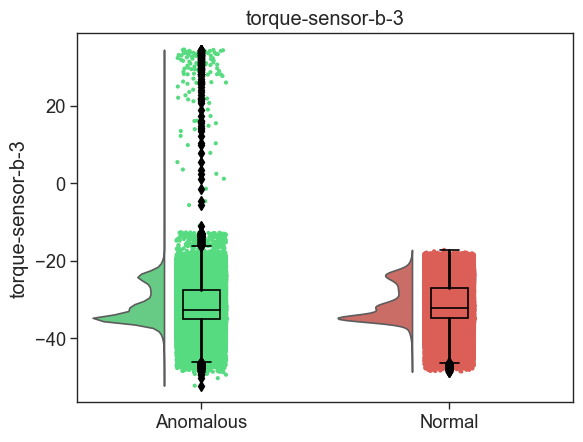

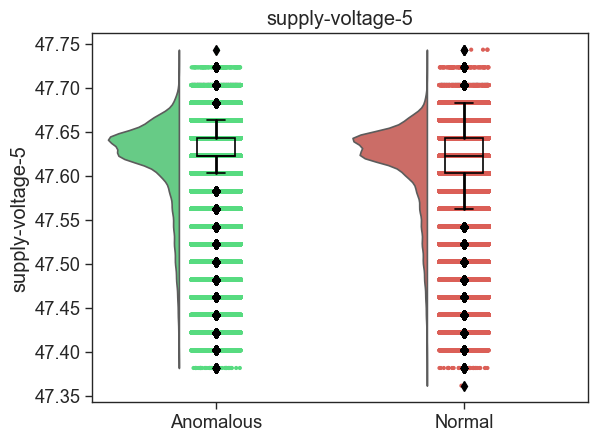

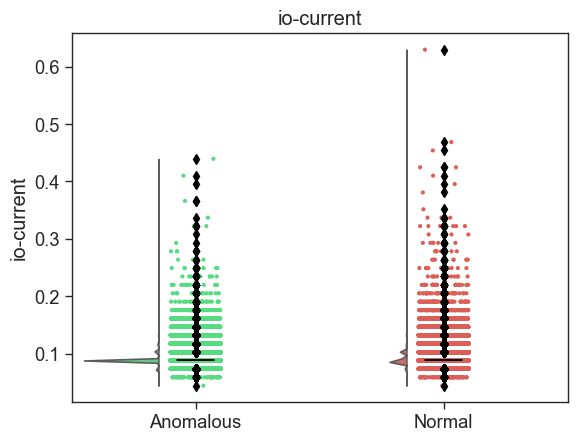

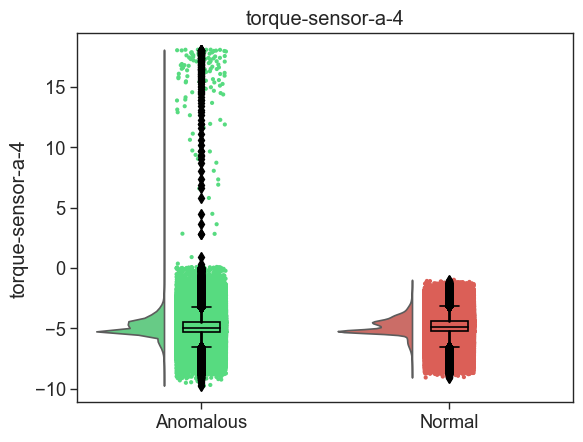

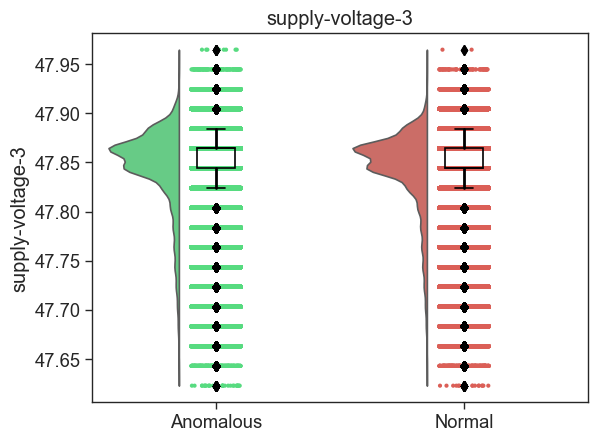

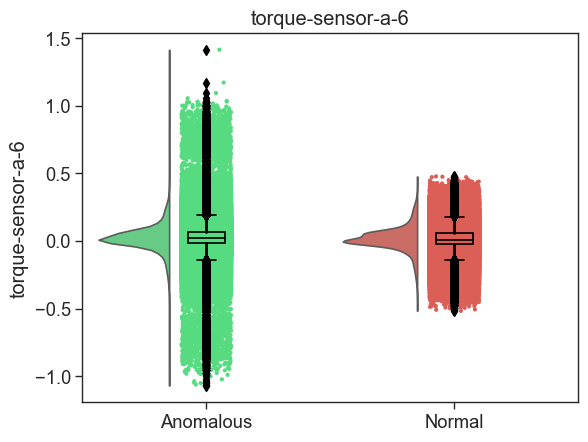

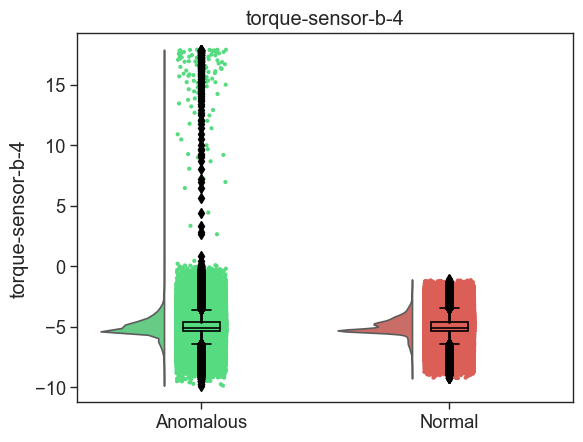

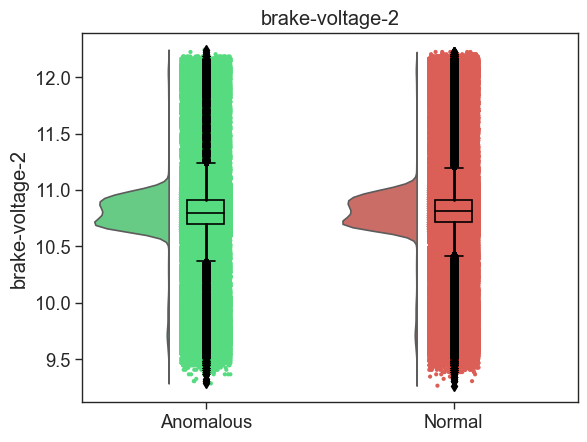

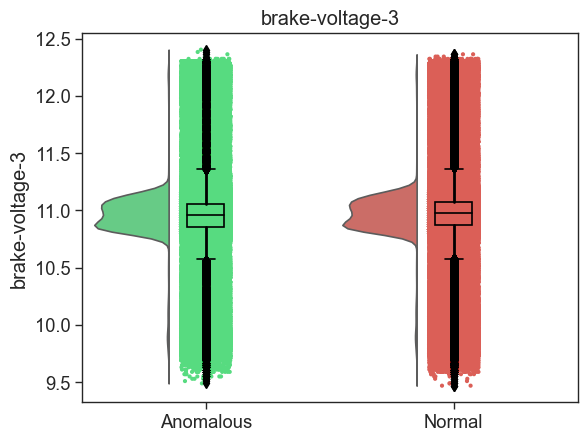

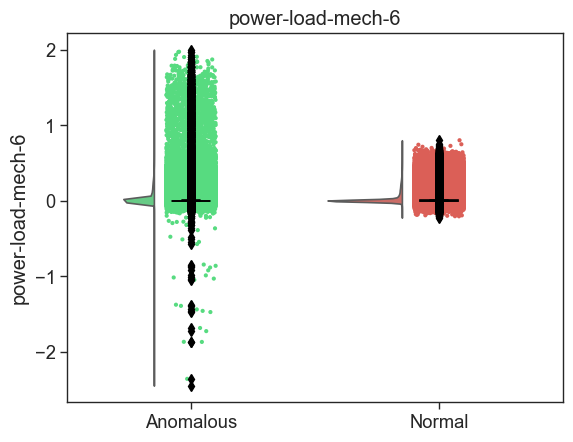

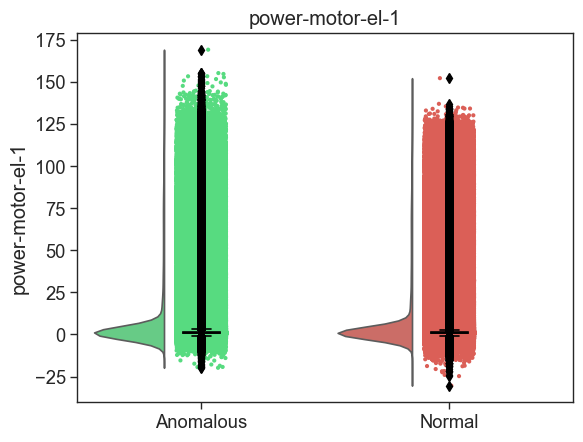

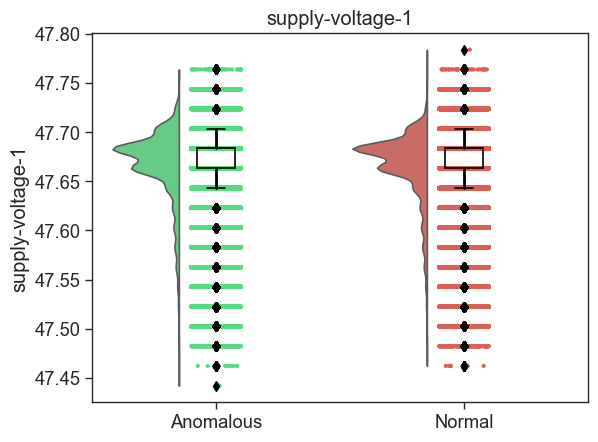

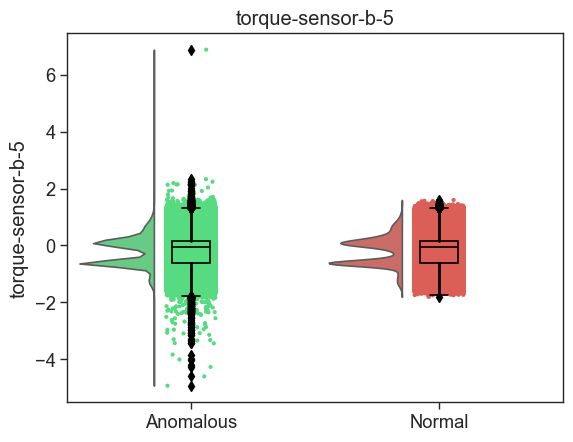

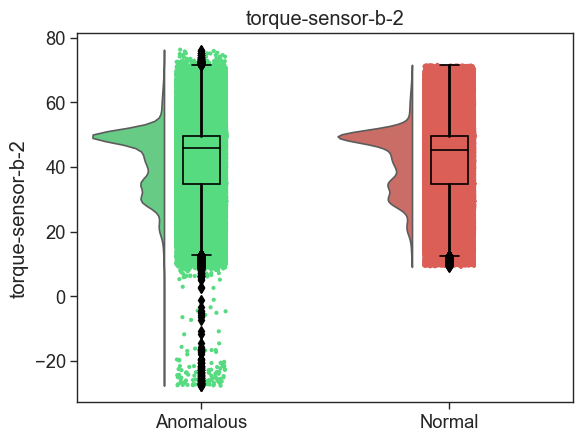

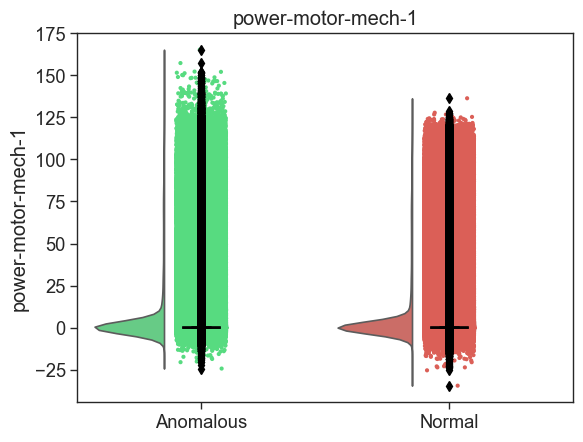

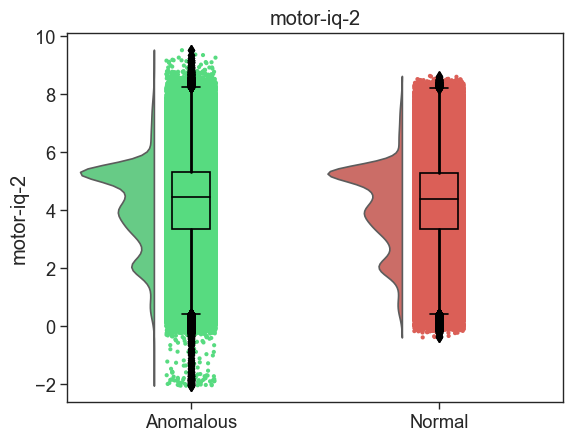

In [18]:
for col in top_20_features:
    raincloud_plot(col, 'anomaly', df)

# Clustermap

## Top 20 Features

In [12]:
top_20_features = ['robot_voltage', 'supply_voltage_2', 'torque_sensor_a_3', 'torque_sensor_b_6', 'torque_sensor_b_3', 'supply_voltage_5', 'io_current', 'torque_sensor_a_4', 'supply_voltage_3', 'torque_sensor_a_6',
                   'torque_sensor_b_4', 'brake_voltage_2', 'brake_voltage_3', 'power_load_mech_6', 'power_motor_el_1', 'supply_voltage_1', 'torque_sensor_b_5', 'torque_sensor_b_2', 'power_motor_mech_1', 'motor_iq_2',
                   'anomaly']

data_20_predictors = df[top_20_features]
data_20_predictors

robot_voltage  supply_voltage_2  torque_sensor_a_3  \
0            48.582687         47.482258         -32.643375   
1            48.582687         47.462154         -32.654327   
2            48.561890         47.442055         -32.654327   
3            48.582687         47.482258         -32.665279   
4            48.582687         47.482258         -32.676228   
...                ...               ...                ...   
2321685      48.561890         47.442055         -23.345894   
2321686      48.561890         47.462154         -23.630623   
2321687      48.541092         47.462154         -24.265787   
2321688      48.582687         47.462154         -25.798941   
2321689      48.582687         47.442055         -28.985710   

         torque_sensor_b_6  torque_sensor_b_3  supply_voltage_5  io_current  \
0                -0.066240         -31.770451         47.622978    0.087890   
1                -0.063480         -31.595356         47.622978    0.087890   
2                -0.080041         -31.584412         47.622978    0.087890   
3                -0.066240         -31.595356         47.622978    0.087890   
4                -0.074521         -31.661018         47.643078    0.087890   
...                    ...                ...               ...         ...   
2321685          -0.063480         -22.588913         47.643078    0.087890   
2321686          -0.044160         -22.643631         47.622978    0.073242   
2321687          -0.049680         -23.157972         47.622978    0.087890   
2321688          -0.044160         -24.788544         47.663181    0.117187   
2321689          -0.052440         -27.896477         47.643078    0.087890   

         torque_sensor_a_4  supply_voltage_3  torque_sensor_a_6  ...  \
0                -4.513991         47.864208           0.069086  ...   
1                -4.522561         47.864208           0.055269  ...   
2                -4.528273         47.864208           0.060796  ...   
3                -4.516848         47.844105           0.046979  ...   
4                -4.516848         47.864208           0.046979  ...   
...                    ...               ...                ...  ...   
2321685          -2.743071         47.844105           0.055269  ...   
2321686          -3.228646         47.844105           0.041452  ...   
2321687          -2.851612         47.864208           0.066323  ...   
2321688          -3.471434         47.844105           0.069086  ...   
2321689          -3.785629         47.864208           0.066323  ...   

         brake_voltage_2  brake_voltage_3  power_load_mech_6  \
0              10.734771        11.056413       1.157006e-05   
1              10.754872        11.156926      -7.832955e-07   
2              10.694568        10.835285       4.344085e-07   
3              11.016207        10.915694       2.882664e-06   
4              10.734771        11.016208       6.304338e-07   
...                  ...              ...                ...   
2321685        10.754875        11.036309      -1.502957e-05   
2321686        10.895590        10.895592       7.213437e-07   
2321687        10.774975        11.116721       9.829410e-06   
2321688         9.448206        10.815182       7.721170e-06   
2321689        10.694568        11.136824       8.201027e-06   

         power_motor_el_1  supply_voltage_1  torque_sensor_b_5  \
0                0.754705         47.663181           0.058321   
1                0.725759         47.663181           0.037849   
2                0.724332         47.663181           0.049547   
3                0.736677         47.683285           0.067095   
4                0.733309         47.683285           0.029075   
...                   ...               ...                ...   
2321685          0.546533         47.663181          -0.038191   
2321686          0.290468         47.683285           0.119738   
2321687          0.113139         47.663181           0.096341   
2321688  

In [14]:
# Set a random state
random_state = 42
subset_20_predictors = data_20_predictors.sample(n=5000, random_state=random_state)
subset_20_predictors

robot_voltage  supply_voltage_2  torque_sensor_a_3  \
1094531      48.541092         47.321438         -42.433655   
1247071      48.561890         47.462154         -35.479710   
463012       48.582687         47.442055         -28.076769   
366320       48.561890         47.442055         -35.348297   
609992       48.582687         47.442055         -20.816191   
...                ...               ...                ...   
32434        48.603485         47.462154         -35.468758   
1409862      48.541092         47.361645         -30.792641   
1907518      48.582687         47.462154         -21.834644   
568162       48.541092         47.321438         -30.847397   
658639       48.561890         47.421951         -30.026062   

         torque_sensor_b_6  torque_sensor_b_3  supply_voltage_5  io_current  \
1094531          -0.063480         -40.328213         47.482258    0.117187   
1247071          -0.237364         -35.009705         47.643078    0.087890   
463012           -0.080041         -27.918365         47.602875    0.087890   
366320           -0.226324         -34.801781         47.643078    0.087890   
609992           -0.046920         -21.428909         47.643078    0.102538   
...                    ...                ...               ...         ...   
32434            -0.204244         -34.801781         47.643078    0.087890   
1409862          -0.049680         -28.990822         47.542564    0.117187   
1907518          -0.077281         -20.411171         47.643078    0.087890   
568162            0.171125         -30.096107         47.462154    0.087890   
658639           -0.126962         -29.351952         47.562668    0.087890   

         torque_sensor_a_4  supply_voltage_3  torque_sensor_a_6  ...  \
1094531          -6.002136         47.703388          -0.035923  ...   
1247071          -5.225216         47.884308          -0.024869  ...   
463012           -3.928445         47.824001           0.088430  ...   
366320           -5.305193         47.864208          -0.013816  ...   
609992           -3.411451         47.864208           0.071850  ...   
...                    ...               ...                ...  ...   
32434            -5.242354         47.864208           0.019345  ...   
1409862          -5.702222         47.783798           0.063559  ...   
1907518          -3.348612         47.844105          -0.066320  ...   
568162           -4.556836         47.683285           0.082903  ...   
658639           -5.050980         47.783798           0.265288  ...   

         brake_voltage_2  brake_voltage_3  power_load_mech_6  \
1094531        10.734771        11.036311           0.000219   
1247071        10.654359        11.116718           0.000133   
463012         10.694568        10.855386          -0.000018   
366320         10.935798        10.976003          -0.000067   
609992         10.875490        10.996105           0.000035   
...                  ...              ...                ...   
32434          10.935795        10.935798          -0.000020   
1409862         9.669337        11.016209          -0.000026   
1907518        10.674461        10.895592           0.000371   
568162         10.915694        10.915695           0.178784   
658639          9.749746        11.076516           0.127542   

         power_motor_el_1  supply_voltage_1  torque_sensor_b_5  \
1094531          0.365274         47.562668           0.040773   
1247071          1.428548         47.663181          -0.626036   
463012           0.423555         47.663181           0.181154   
366320           1.041556         47.643078          -0.626036   
609992           1.072137         47.683285          -0.272159   
...                   ...               ...                ...   
32434            0.719959         47.683285          -0.628960   
1409862          0.420885         47.602875          -0.017719   
1907518          1.436869         47.683285           0.128511   
568162   

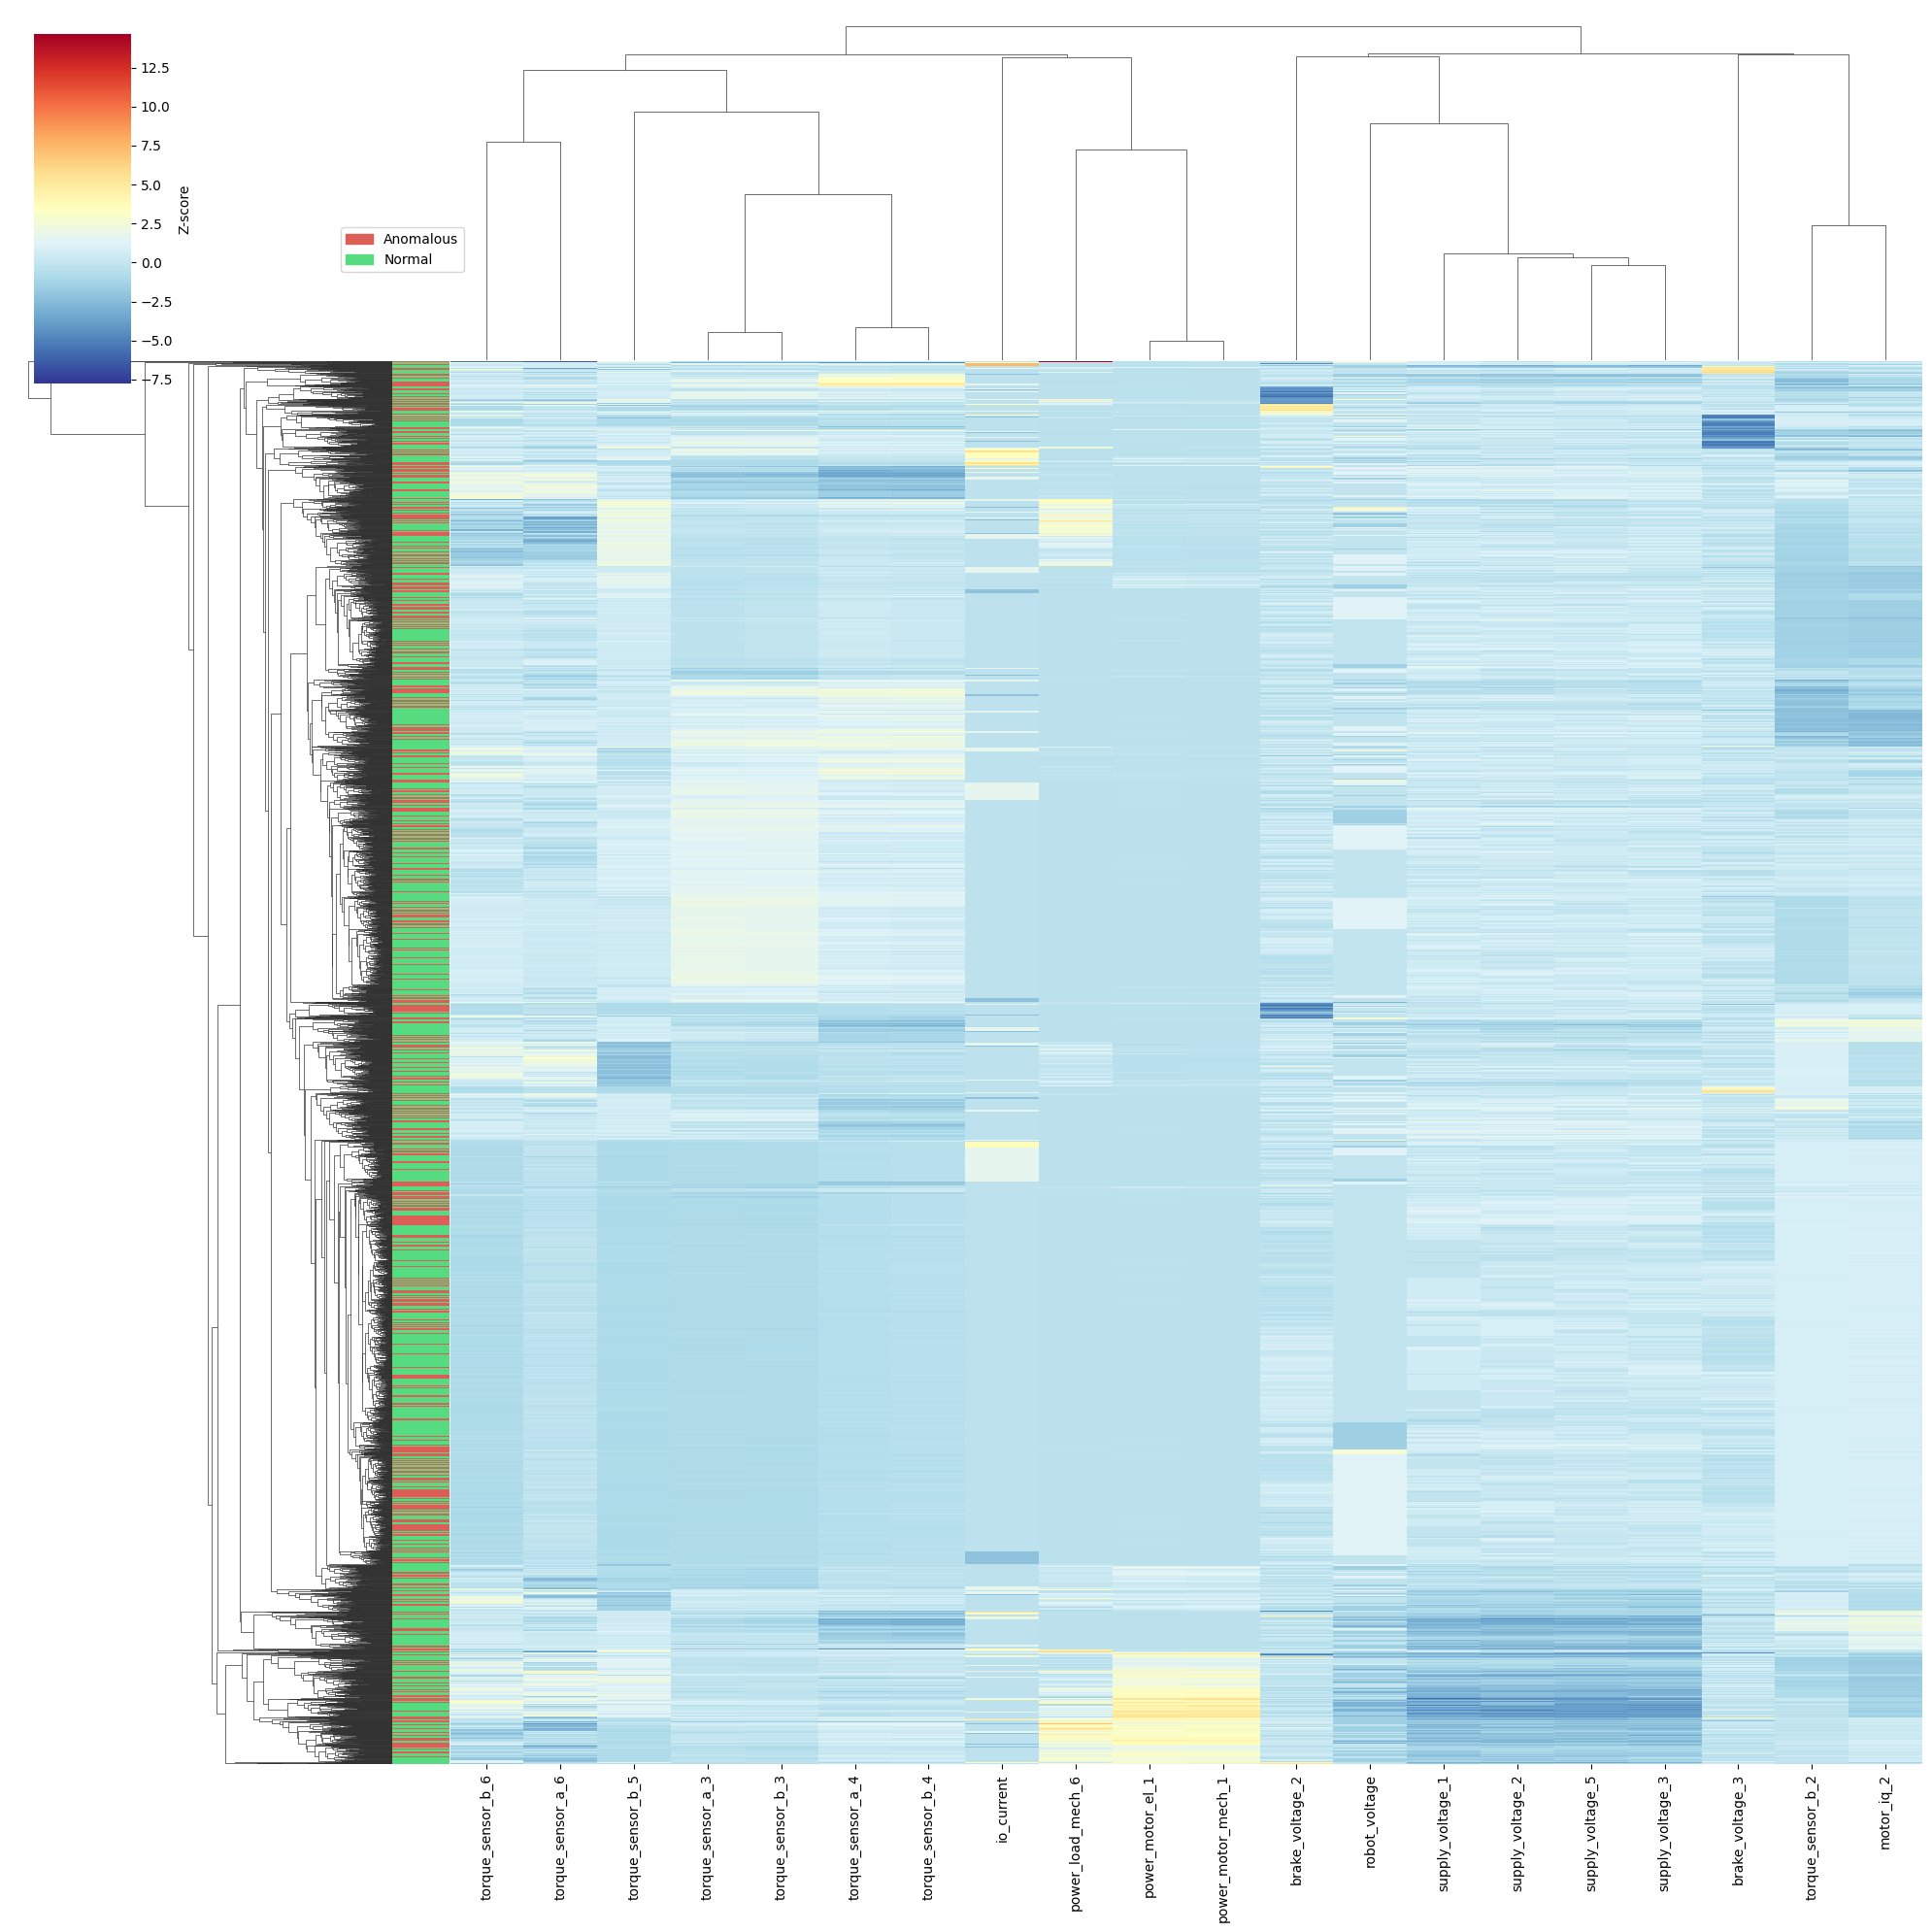

In [15]:
# Create a color dictionary for your categories
colors = sns.color_palette("hls", 8)
red = colors[0]
green = colors[3]
color_dict = {1: red, 0: green}


# Create a list of colors for each row
row_colors = subset_20_predictors['anomaly'].map(color_dict).values

# plot the re-ordered cluster map
cbar_kws={'orientation': 'vertical',
        'label': 'Z-score',
        'extendrect':True,
        'shrink': .5,
        }

# Create the clustermap
cluster=sns.clustermap(subset_20_predictors.drop('anomaly', axis=1),
                       row_colors=row_colors,
                       z_score=1,
                       cmap='RdYlBu_r',
                       col_cluster=True,
                       yticklabels=False,
                       cbar_kws=cbar_kws,
                      #  method='centroid',
                       figsize=(20,20),
                       )

plt.setp(cluster.ax_heatmap.get_xticklabels(), 
        rotation=90
        )

legend_labels = [mpatches.Patch(color=red, label='Anomalous'),
                mpatches.Patch(color=green, label='Normal')]
    
plt.legend(handles=legend_labels, 
           title='', 
           loc='lower right', 
           bbox_to_anchor=(4.5, 0.3),
           **{'ncol': 1})

# cb_ax = cluster.ax_cbar.yaxis.set_label_position('left')
plt.xlabel('Target', visible=False)

# Show the plot
if os.path.exists('figures/clustermap/'):
    pass
else:
    os.makedirs('figures/clustermap/')

plt.savefig('figures/clustermap/clustermap_20_predictors.png', dpi=1200, bbox_inches='tight')

plt.show()

## Top 10 Predictors

In [17]:
df_corr = pd.read_csv("figures/corr/corr_value.csv",index_col=0)
df_corr

robot_voltage  supply_voltage_2  torque_sensor_a_3  \
robot_voltage            1.000000          0.386591           0.002517   
supply_voltage_2         0.386591          1.000000           0.015136   
torque_sensor_a_3        0.002517          0.015136           1.000000   
torque_sensor_b_6       -0.080398         -0.114522           0.333743   
torque_sensor_b_3        0.008214          0.021650           0.991449   
supply_voltage_5         0.406196          0.886040          -0.004534   
io_current              -0.034662         -0.053039           0.003274   
torque_sensor_a_4       -0.001234         -0.004630           0.720538   
supply_voltage_3         0.398860          0.881996           0.010604   
torque_sensor_a_6        0.061730          0.022531           0.119019   
torque_sensor_b_4       -0.011573          0.002740           0.691143   
brake_voltage_2          0.022152          0.096865           0.000020   
brake_voltage_3          0.027682          0.021608           0.000758   
power_load_mech_6       -0.198182         -0.386200          -0.031685   
power_motor_el_1        -0.371773         -0.673544          -0.023971   
supply_voltage_1         0.383530          0.867817           0.013963   
torque_sensor_b_5       -0.055993         -0.107912           0.435197   
torque_sensor_b_2        0.008382          0.006644          -0.486756   
power_motor_mech_1      -0.376744         -0.682505          -0.016517   
motor_iq_2              -0.009823         -0.034340          -0.355515   

                    torque_sensor_b_6  torque_sensor_b_3  supply_voltage_5  \
robot_voltage               -0.080398           0.008214          0.406196   
supply_voltage_2            -0.114522           0.021650          0.886040   
torque_sensor_a_3            0.333743           0.991449         -0.004534   
torque_sensor_b_6            1.000000           0.323139         -0.141906   
torque_sensor_b_3            0.323139           1.000000          0.002475   
supply_voltage_5            -0.141906           0.002475          1.000000   
io_current                   0.011365           0.002815         -0.053242   
torque_sensor_a_4            0.118424           0.738214         -0.022211   
supply_voltage_3            -0.127747           0.017341          0.897338   
torque_sensor_a_6            0.502336           0.116405          0.018171   
torque_sensor_b_4            0.089433           0.708170         -0.016862   
brake_voltage_2             -0.005474           0.000832          0.024556   
brake_voltage_3             -0.005507           0.001970          0.029972   
power_load_mech_6           -0.022113          -0.042730         -0.418171   
power_motor_el_1             0.134364          -0.033036         -0.712443   
supply_voltage_1            -0.118515           0.020959          0.879391   
torque_sensor_b_5            0.143071           0.439494         -0.115940   
torque_sensor_b_2           -0.177815          -0.506045          0.022248   
power_motor_mech_1           0.133963          -0.025348         -0.721958   
motor_iq_2                  -0.402507          -0.376461          0.003226   

                    io_current  torque_sensor_a_4  supply_voltage_3  \
robot_voltage        -0.034662          -0.001234          0.398860   
supply_voltage_2     -0.053039          -0.004630          0.881996   
torque_sensor_a_3     0.003274           0.720538          0.010604   
torque_sensor_b_6     0.011365           0.118424         -0.127747   
torque_sensor_b_3     0.002815           0.738214          0.017341   
supply_voltage_5     -0.053242          -0.022211          0.897338   
io_current            1.000000           0.005239         -0.052606   
torque_sensor_a_4     0.005239           1.000000         -0.007994   
supply_voltage_3     -0.052606          -0.007994          1.000000   
torque_sensor_a_6    -0.004154          -0.042083          0.016228   
torque_sensor_b_4     0.004258           0.98

In [18]:
df_corr = df_corr.abs()

# Identify the upper triangle of the correlation matrix
upper = df_corr.where(
    np.triu(np.ones(df_corr.shape), k=1).astype(bool))

# Find features with correlation coefficient greater than the threshold
threshold = 0.6
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Highly correlated features to drop (threshold > {threshold}):", to_drop)

Highly correlated features to drop (threshold > 0.6): ['torque_sensor_b_3', 'supply_voltage_5', 'torque_sensor_a_4', 'supply_voltage_3', 'torque_sensor_b_4', 'power_motor_el_1', 'supply_voltage_1', 'torque_sensor_b_2', 'power_motor_mech_1', 'motor_iq_2']


In [22]:
filtered_features = [feature for feature in top_20_features if feature not in to_drop]
filtered_features

['robot_voltage',
 'supply_voltage_2',
 'torque_sensor_a_3',
 'torque_sensor_b_6',
 'io_current',
 'torque_sensor_a_6',
 'brake_voltage_2',
 'brake_voltage_3',
 'power_load_mech_6',
 'torque_sensor_b_5',
 'anomaly']

In [23]:
custom_cols = ['robot_voltage',
 'supply_voltage_2',
 'torque_sensor_a_3',
 'torque_sensor_b_6',
 'io_current',
 'torque_sensor_a_6',
 'brake_voltage_2',
 'brake_voltage_3',
 'power_load_mech_6',
 'torque_sensor_b_5',
 'anomaly']

In [26]:
# Set a random state
data = df[custom_cols]

random_state = 42
subset = data.sample(n=5000, random_state=random_state)
subset

robot_voltage  supply_voltage_2  torque_sensor_a_3  \
1094531      48.541092         47.321438         -42.433655   
1247071      48.561890         47.462154         -35.479710   
463012       48.582687         47.442055         -28.076769   
366320       48.561890         47.442055         -35.348297   
609992       48.582687         47.442055         -20.816191   
...                ...               ...                ...   
32434        48.603485         47.462154         -35.468758   
1409862      48.541092         47.361645         -30.792641   
1907518      48.582687         47.462154         -21.834644   
568162       48.541092         47.321438         -30.847397   
658639       48.561890         47.421951         -30.026062   

         torque_sensor_b_6  io_current  torque_sensor_a_6  brake_voltage_2  \
1094531          -0.063480    0.117187          -0.035923        10.734771   
1247071          -0.237364    0.087890          -0.024869        10.654359   
463012           -0.080041    0.087890           0.088430        10.694568   
366320           -0.226324    0.087890          -0.013816        10.935798   
609992           -0.046920    0.102538           0.071850        10.875490   
...                    ...         ...                ...              ...   
32434            -0.204244    0.087890           0.019345        10.935795   
1409862          -0.049680    0.117187           0.063559         9.669337   
1907518          -0.077281    0.087890          -0.066320        10.674461   
568162            0.171125    0.087890           0.082903        10.915694   
658639           -0.126962    0.087890           0.265288         9.749746   

         brake_voltage_3  power_load_mech_6  torque_sensor_b_5  anomaly  
1094531        11.036311           0.000219           0.040773        0  
1247071        11.116718           0.000133          -0.626036        0  
463012         10.855386          -0.000018           0.181154        1  
366320         10.976003          -0.000067          -0.626036        1  
609992         10.996105           0.000035          -0.272159        1  
...                  ...                ...                ...      ...  
32434          10.935798          -0.000020          -0.628960        1  
1409862        11.016209          -0.000026          -0.017719        0  
1907518        10.895592           0.000371           0.128511        0  
568162         10.915695           0.178784           0.467765        1  
658639         11.076516           0.127542          -1.111519        1  

[5000 rows x 11 columns]

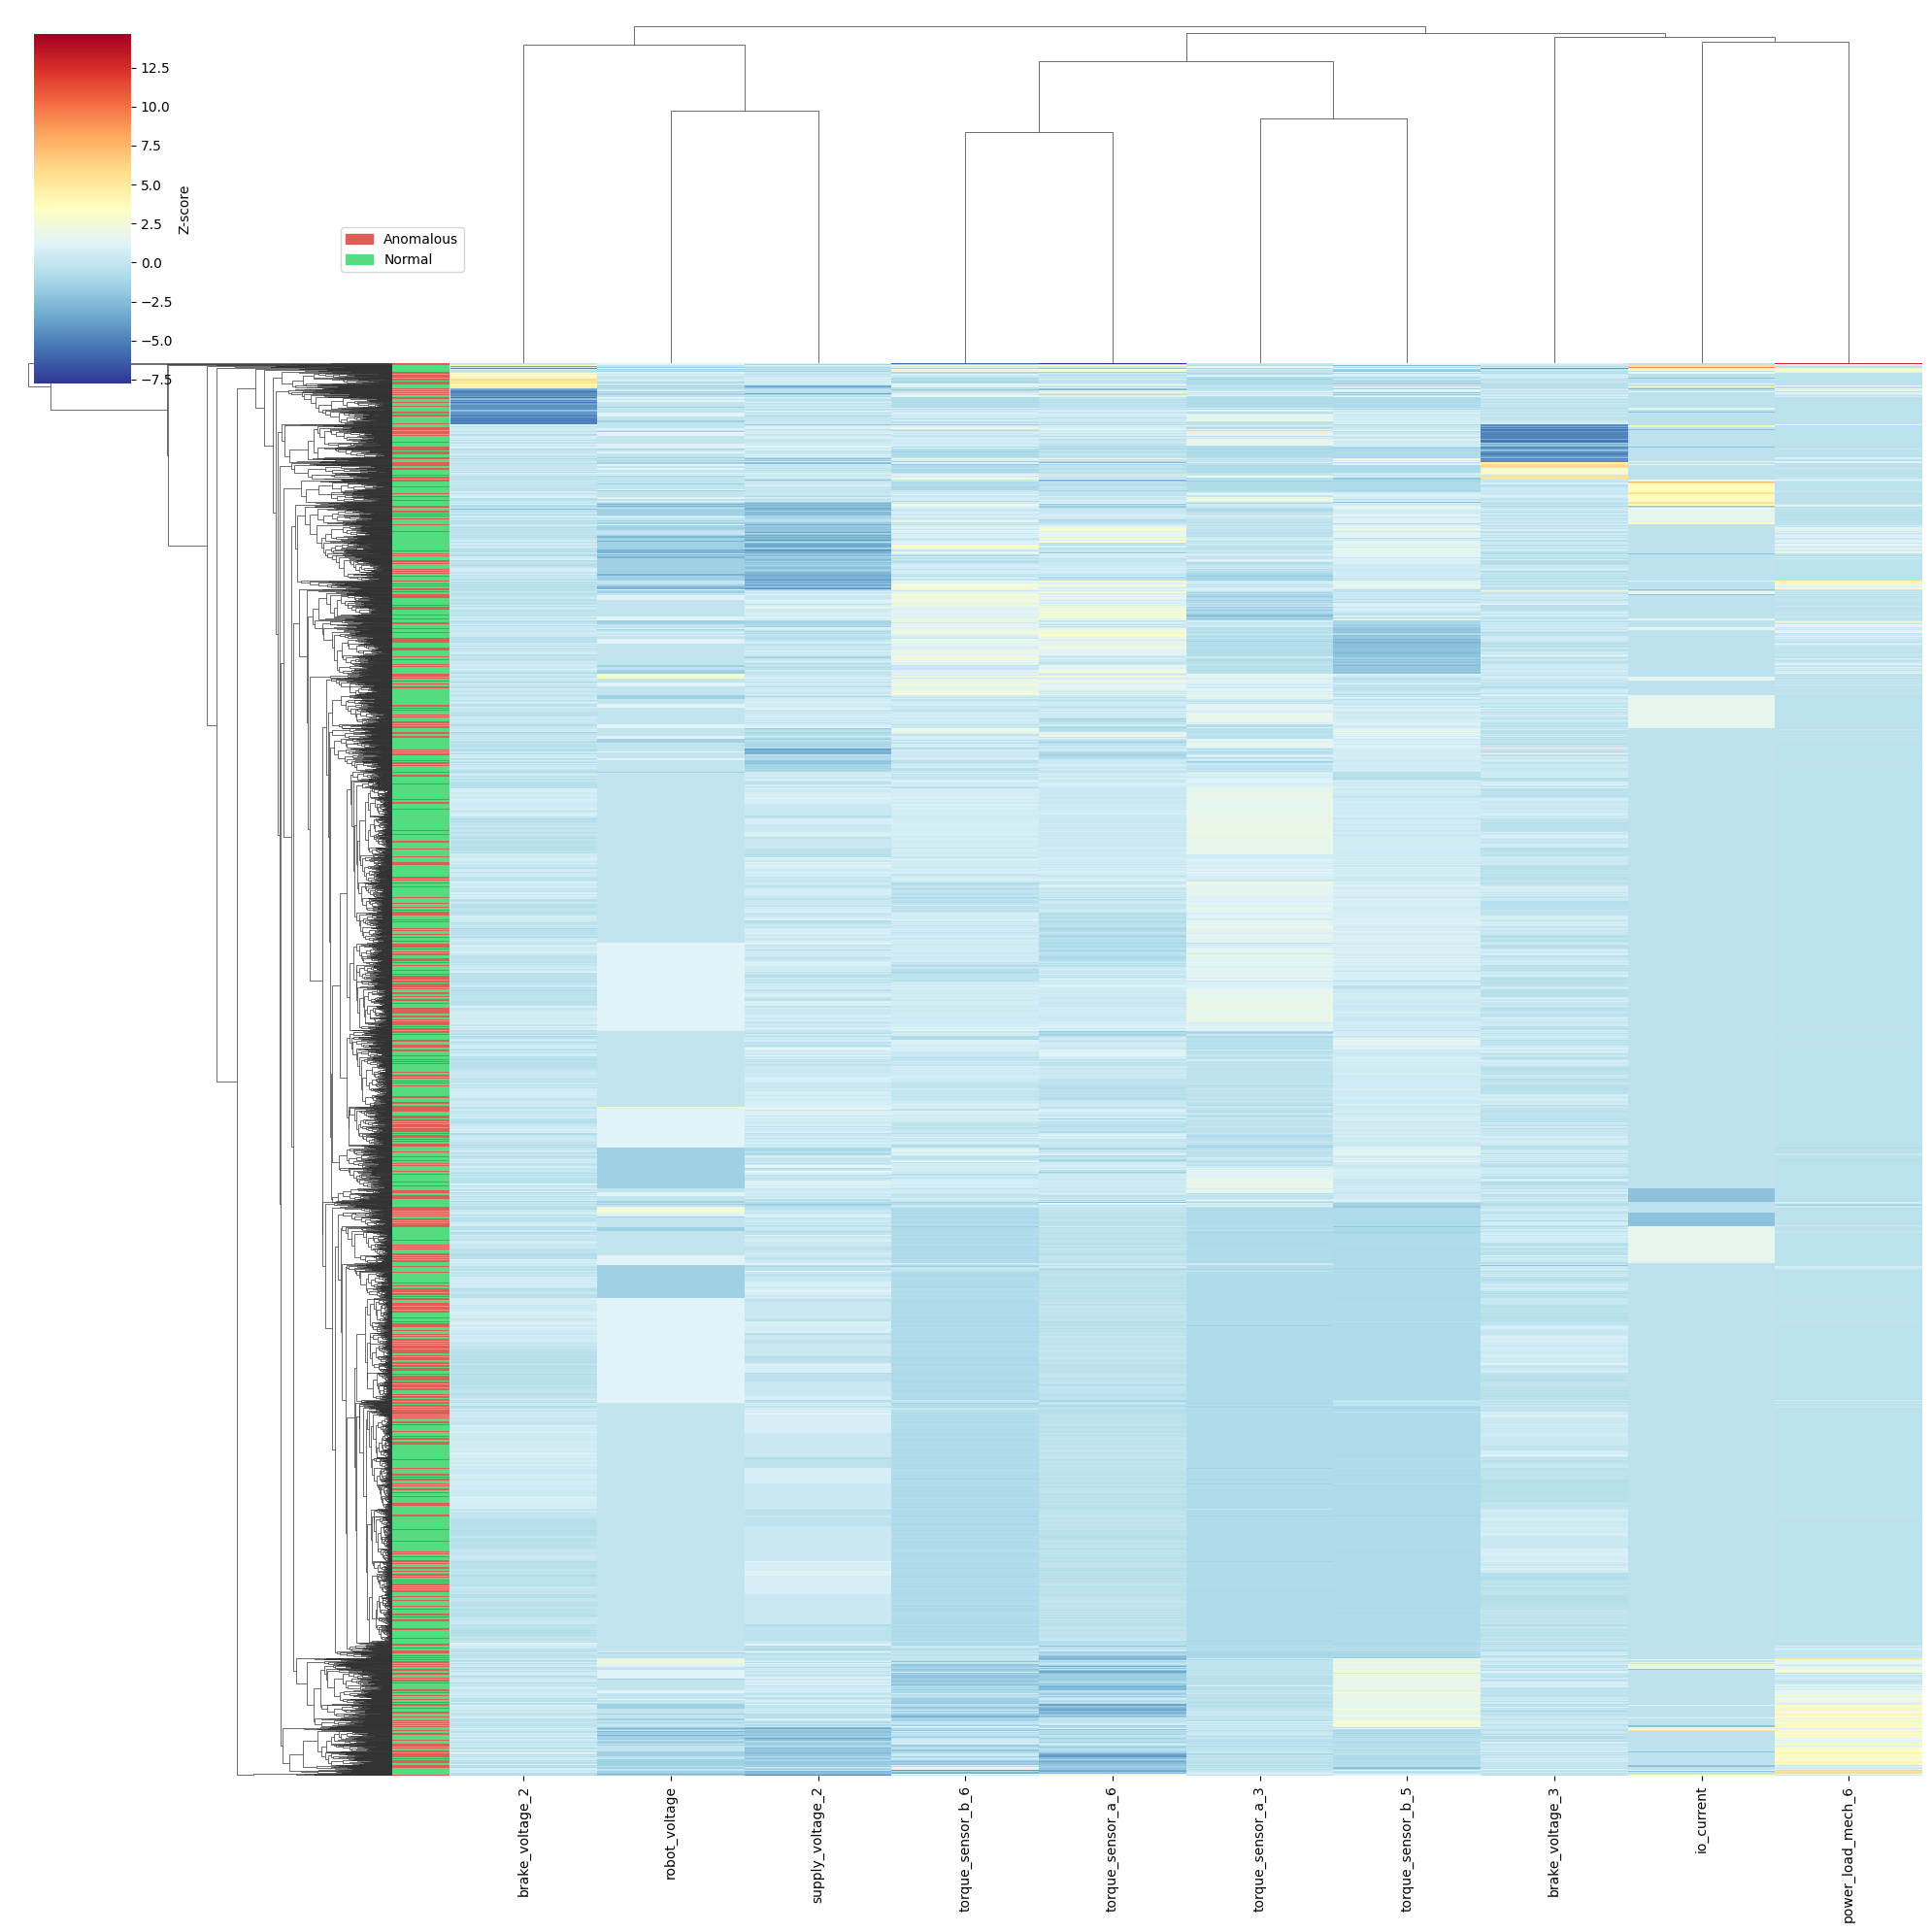

In [27]:
# Create a color dictionary for your categories
colors = sns.color_palette("hls", 8)
red = colors[0]
green = colors[3]
color_dict = {1: red, 0: green}


# Create a list of colors for each row
row_colors = subset['anomaly'].map(color_dict).values

# plot the re-ordered cluster map
cbar_kws={'orientation': 'vertical',
        'label': 'Z-score',
        'extendrect':True,
        'shrink': .5,
        }

# Create the clustermap
cluster=sns.clustermap(subset.drop('anomaly', axis=1),
                       row_colors=row_colors,
                       z_score=1,
                       cmap='RdYlBu_r',
                       col_cluster=True,
                       yticklabels=False,
                       cbar_kws=cbar_kws,
                      #  method='centroid',
                       figsize=(20,20),
                       )

plt.setp(cluster.ax_heatmap.get_xticklabels(), 
        rotation=90
        )

legend_labels = [mpatches.Patch(color=red, label='Anomalous'),
                mpatches.Patch(color=green, label='Normal')]
    
plt.legend(handles=legend_labels, 
           title='', 
           loc='lower right', 
           bbox_to_anchor=(4.5, 0.3),
           **{'ncol': 1})

# cb_ax = cluster.ax_cbar.yaxis.set_label_position('left')
plt.xlabel('Target', visible=False)

# Show the plot
if os.path.exists('figures/clustermap/'):
    pass
else:
    os.makedirs('figures/clustermap/')

plt.savefig('figures/clustermap/clustermap_10_predictors.png', dpi=1200, bbox_inches='tight')

plt.show()